# MSDS 422 Assignment 2 - Evaluating Regression Models:

Compete in the House Prices:  Advanced Regression Techniques competition here:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques.  You must establish an account with Kaggle.com (free). 

Use many explanatory variables for your predictions. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. Evaluate these methods within a cross-validation design using the root mean-squared error (RMSE) as an index of prediction error.  Submit your models to Kaggle.com for evaluation on the test set.  Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.

Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

#### Programming Resources
A detailed example shows how to evaluate alternative regressors within a cross-validation design:  That is example is entitled "Regression Examples: Predicting Sales" under Technology Resources.

#### Grading Guidelines (50 points)
- Data preparation, exploration, visualization (10 points)
- Review research design and modeling methods (10 points)
- Review results, evaluate models (10 points)
- Implementation and programming  as evidenced by Kaggle submission (10 points)
- Exposition, problem description, and management recommendations (10 points)

### Table of Contents
- Data preparation, exploration, visualization (10 points)

## Data preparation, exploration, visualization (10 points)

Import Libraries

In [904]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import sklearn
import math
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

from IPython.display import display
from IPython.display import HTML

def clear_plot():
    plt.cla()   # Clear axis
    plt.clf()   # Clear figure
    plt.close() # Close a figure window

In [905]:
train_set = pd.read_csv('data/train.csv')
test_set = pd.read_csv('data/test.csv')

In [906]:
train_set.shape

(1460, 81)

In [907]:
test_set.shape

(1459, 80)

In [908]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [909]:
train_set.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [910]:
train_set.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [911]:
train_set.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

Convert date fields to datetime to allow for easy sorting later if needed

In [912]:
train_set['YearBuilt'] = pd.to_datetime(train_set['YearBuilt'], format='%Y')
train_set['YearRemodAdd'] = pd.to_datetime(train_set['YearRemodAdd'], format='%Y')
# create a new column combining month and year
def fixdate(m,y):
    return pd.to_datetime(str(y) + "/" + str(m))
train_set['SaleDate'] = train_set.apply(lambda x: fixdate(x.MoSold, x.YrSold), axis=1)

Inspect missing values

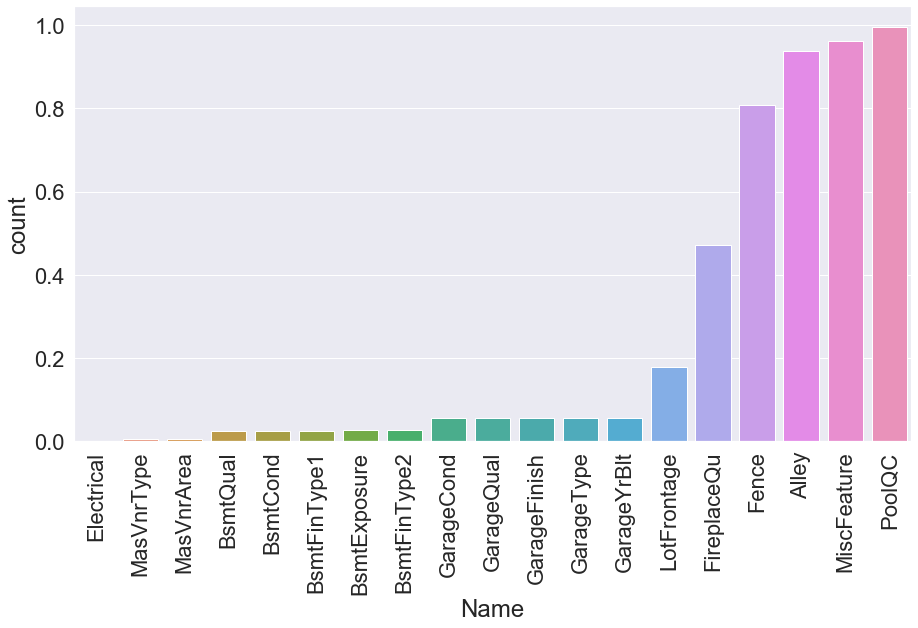

In [913]:
# get percent of missing values
missing_values = train_set.isnull().sum() / len(train_set)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

# convert to DataFrame
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

# plot graph
plt.subplots(figsize=(15,8))
sns.set(style='whitegrid', color_codes = True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

For now I am going to leave the missing data fields as is

### Get insights on what are good predictors of SalePrice where we have numerical features

### Exploration 1: Which features have perform well as predictors of SalePrice?

This section will look at all features and plot a scatter, boxplot, or both to determine if they are good predictors of SalePrice. If there are to many categories to plot a table containing mean and median will be used instead

First let's define a dictionary that contains each feature and what graph to create:
- both: creates a scatter and boxplot
- scatter: creates a scatter plot
- boxplot: creates a boxplot
- mean-median: determines the mean, median, min, and max

In [914]:
cols_to_inspect = {
    'MSSubClass': 'boxplot', # Identifies the type of dwelling involved in the sale
    'MSZoning': 'boxplot', # Identifies the general zoning classification of the sale.
    'LotFrontage': 'scatter', # Linear feet of street connected to property
    'LotArea': 'scatter', # Lot size in square feet
    'Street': 'boxplot', # Type of road access to property
    'Alley': 'boxplot', # Type of alley access to property
    'LotShape': 'boxplot', # General shape of property
    'LandContour': 'boxplot', # Flatness of the property
    'Utilities': 'boxplot', # Type of utilities available
    'LotConfig': 'boxplot', # Lot configuration
    'LandSlope': 'boxplot', # Slope of property
    'Neighborhood': 'mean-median', # Physical locations within Ames city limits
    'Condition1': 'boxplot', # Proximity to various conditions
    'Condition2': 'boxplot', # Proximity to various conditions (if more than one is present)
    'BldgType': 'boxpot', # Type of dwelling
    'HouseStyle': 'boxplot', # Style of dwelling
    'OverallQual': 'both', # Rates the overall material and finish of the house
    'OverallCond': 'both', # Rates the overall condition of the house
    'YearBuilt': 'scatter', # Original construction date   ---- year
    'YearRemodAdd': 'scatter', # Remodel date (same as construction date if no remodeling or additions)  ---- year
    'RoofStyle': 'boxplot', # Type of roof
    'RoofMatl': 'boxplot', # Roof material
    'Exterior1st': 'mean-median', # Exterior covering on house
    'Exterior2nd': 'mean-median', # Exterior covering on house (if more than one material)
    'MasVnrType': 'boxplot', # Masonry veneer typ
    'MasVnrArea': 'scatter', # Masonry veneer area in square feet
    'ExterQual': 'boxplot', # Evaluates the quality of the material on the exterior 
    'ExterCond': 'boxplot', # Evaluates the present condition of the material on the exterior
    'Foundation': 'boxplot', # Type of foundation
    'BsmtQual': 'boxplot', # Evaluates the height of the basement
    'BsmtCond': 'boxplot', # Evaluates the general condition of the basement
    'BsmtExposure': 'boxplot', # efers to walkout or garden level walls
    'BsmtFinType1': 'boxplot', # Rating of basement finished area
    'BsmtFinSF1': 'scatter', # Type 1 finished square feet
    'BsmtFinType2': 'boxplot', # Rating of basement finished area (if multiple types)
    'BsmtFinSF2': 'scatter', # Type 2 finished square feet
    'BsmtUnfSF': 'scatter', # Unfinished square feet of basement area
    'TotalBsmtSF': 'scatter', # Total square feet of basement area
    'Heating': 'boxplot', # Type of heating
    'HeatingQC': 'boxplot', # Heating quality and condition
    'CentralAir': 'boxplot', # Central air conditioning
    'Electrical': 'boxplot', # Electrical system
    '1stFlrSF': 'scatter', # First floor square feet
    '2ndFlrSF': 'scatter', # Second floor square feet
    'LowQualFinSF': 'scatter', # Low quality finished square feet (all floors)
    'GrLivArea': 'scatter', # Above grade (ground) living area square feet
    'BsmtFullBath': 'both', # Basement full bathrooms
    'BsmtHalfBath': 'both', # Basement half bathrooms
    'FullBath': 'both', # Full bathrooms above grade
    'HalfBath': 'both', # Half baths above grade
    'BedroomAbvGr': 'both', #  Bedrooms above grade (does NOT include basement bedrooms)
    'KitchenAbvGr': 'both', # Kitchens above grade
    'KitchenQual': 'boxplot', # Kitchen quality
    'TotRmsAbvGrd': 'both', # Total rooms above grade (does not include bathrooms)
    'Functional': 'boxplot', # Home functionality (Assume typical unless deductions are warranted)
    'Fireplaces': 'both', #
    'FireplaceQu': 'boxplot', # Fireplace quality
    'GarageType': 'boxplot', # Garage location
    'GarageYrBlt': 'scatter', # Year garage was built ---- year
    'GarageFinish': 'boxplot', # Interior finish of the garage
    'GarageCars': 'both', # Size of garage in car capacity
    'GarageArea': 'scatter', # Size of garage in square feet
    'GarageQual': 'boxplot', # Garage quality
    'GarageCond': 'boxplot', # Garage condition
    'PavedDrive': 'boxplot', # Paved driveway
    'WoodDeckSF': 'scatter', # Wood deck area in square feet
    'OpenPorchSF': 'scatter', # Open porch area in square feet
    'EnclosedPorch': 'scatter', # Enclosed porch area in square feet
    '3SsnPorch': 'scatter', # Three season porch area in square feet
    'ScreenPorch': 'scatter', # Screen porch area in square feet
    'PoolArea': 'scatter', # Pool area in square feet
    'PoolQC': 'boxplot', # Pool quality
    'Fence': 'boxplot', # Fence quality
    'MiscFeature': 'boxplot', # Miscellaneous feature not covered in other categories
    'MiscVal': 'scatter', # $Value of miscellaneous feature
    #'MoSold': 'scatter', # Month Sold (MM)  ---- year
    #'YrSold': 'scatter', # Year Sold (YYYY)  ---- year
    'SaleDate': 'scatter', # combined column of MoSold and YrSold as a DateTime
    'SaleType': 'boxplot', # Type of sale
    'SaleCondition': 'boxplot' # Condition of sale
}
cols_to_inspect = dict(sorted(cols_to_inspect.items(), key=lambda x: x[0]) )

#### Both Scatter and Boxplots

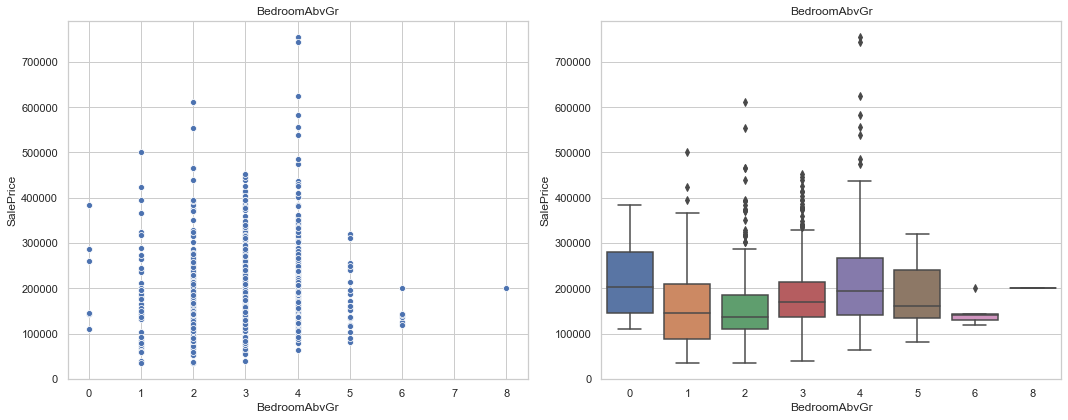

None

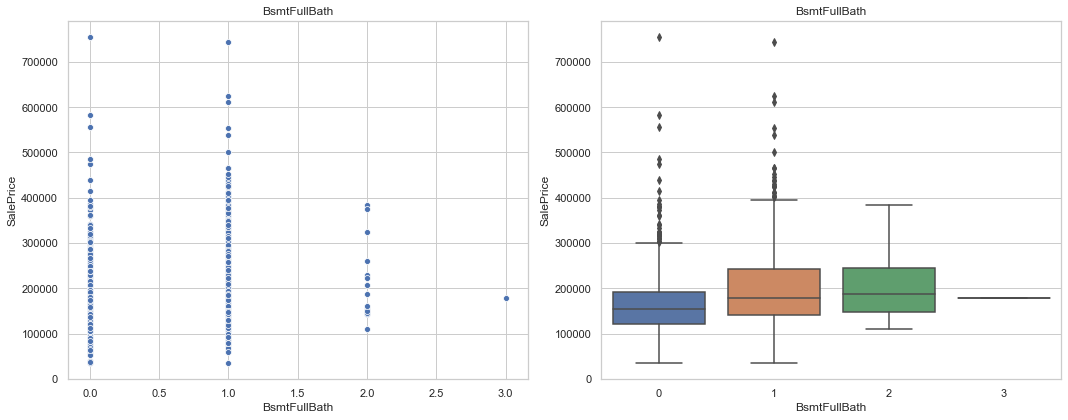

None

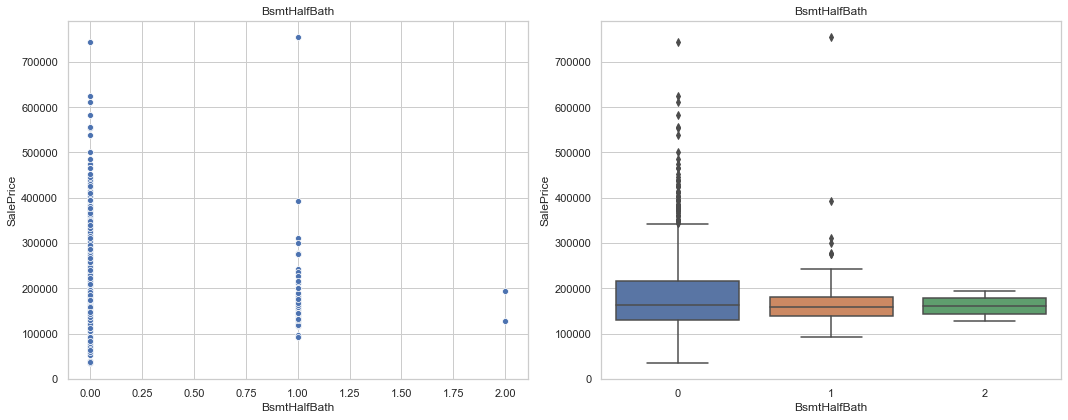

None

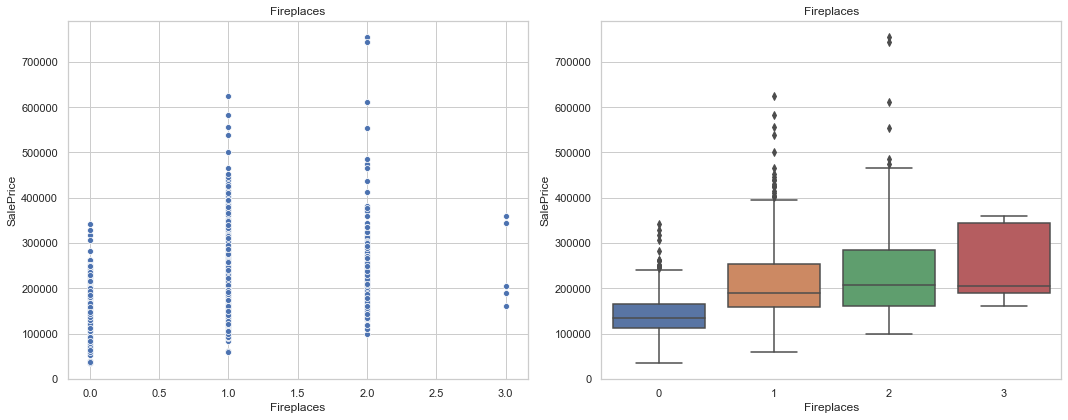

None

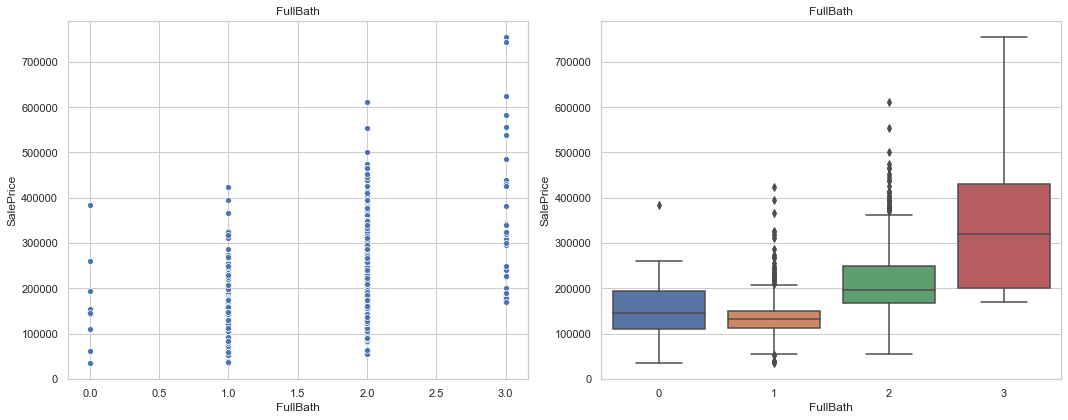

None

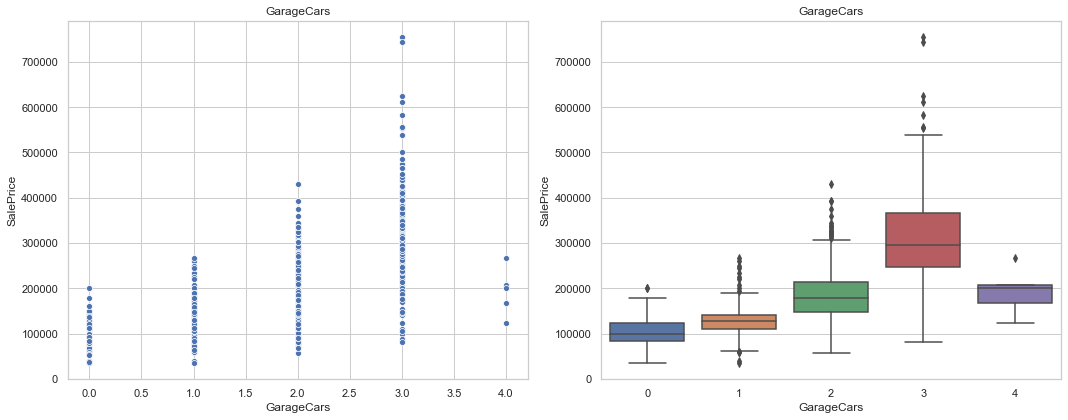

None

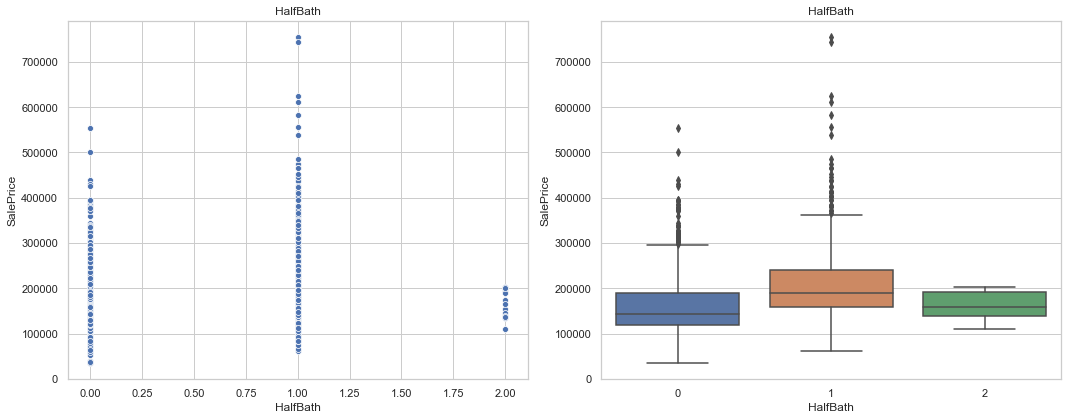

None

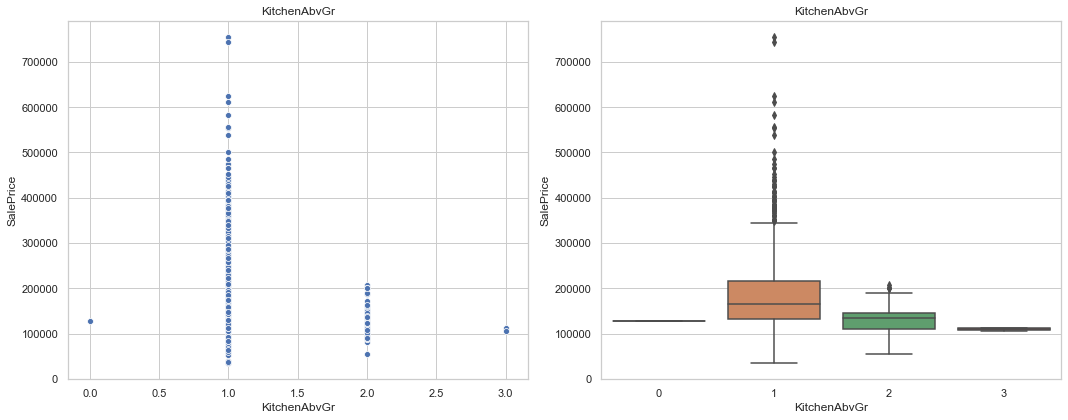

None

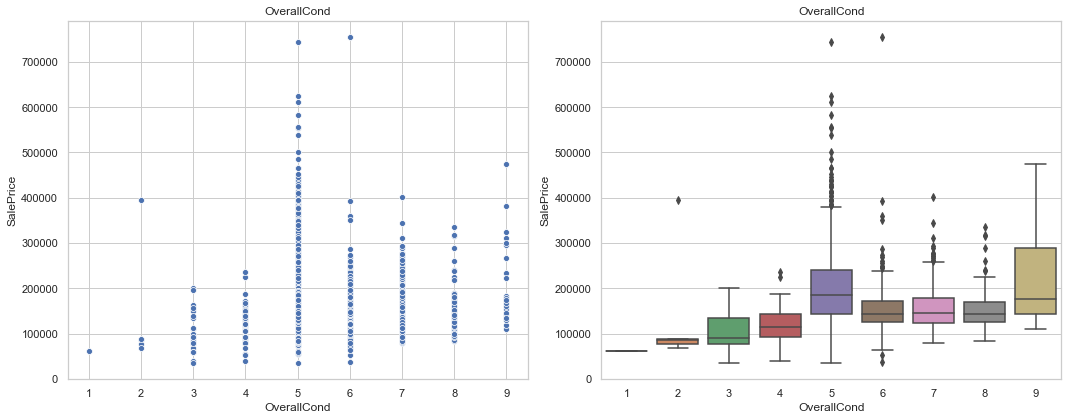

None

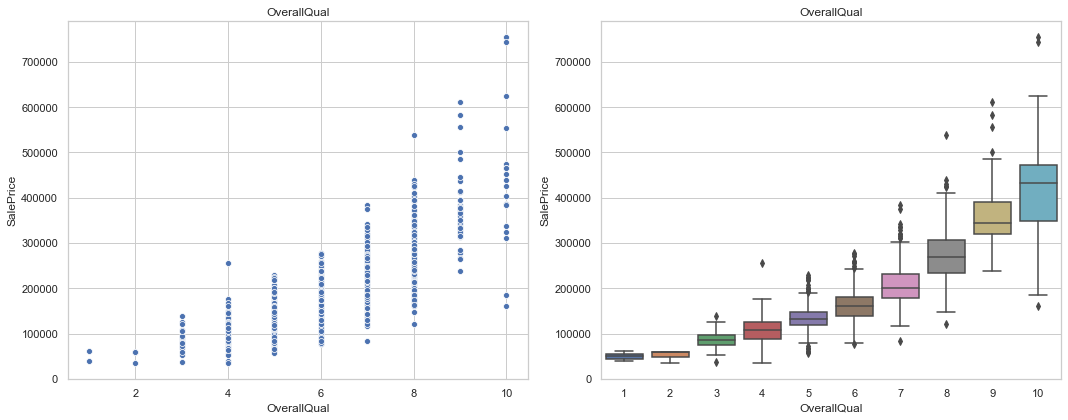

None

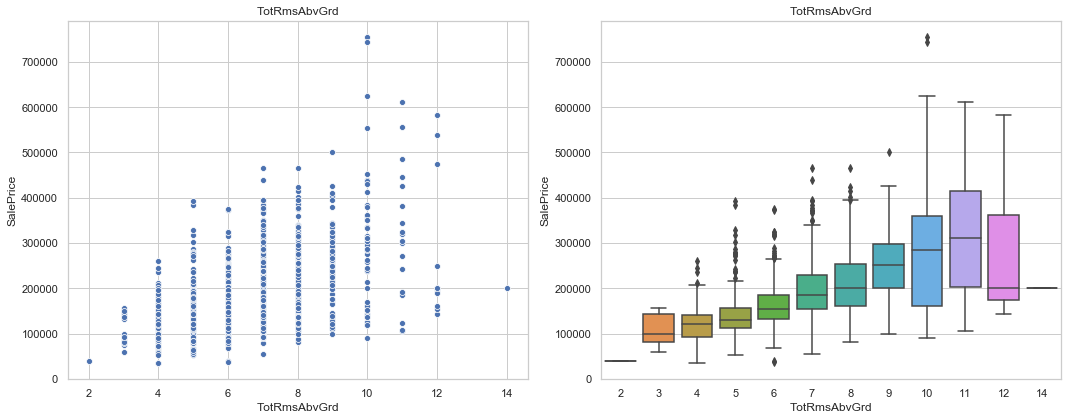

None

In [915]:
for feature in [key for key, value in cols_to_inspect.items() if value == 'both']:
    clear_plot()
    
    fig, axarr = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))
    sns.scatterplot(x=feature, y='SalePrice', data=train_set, ax=axarr[0]).set(title=feature)
    sns.boxplot(x=feature, y='SalePrice', data=train_set, ax=axarr[1]).set(title=feature)
    
    fig.tight_layout()
    display(plt.show())

#### Scatter Plots

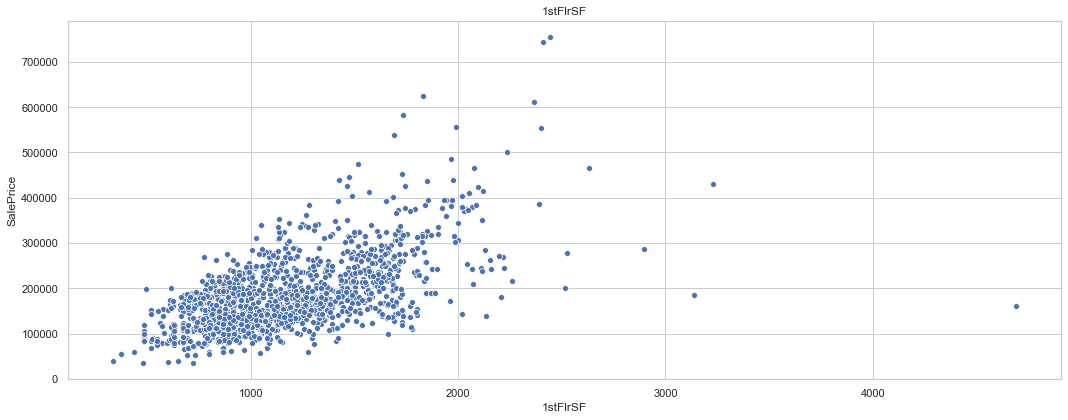

None

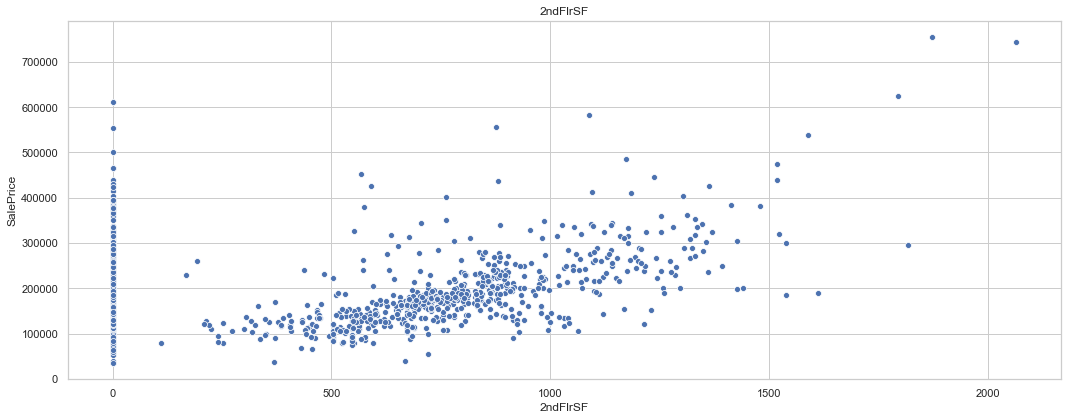

None

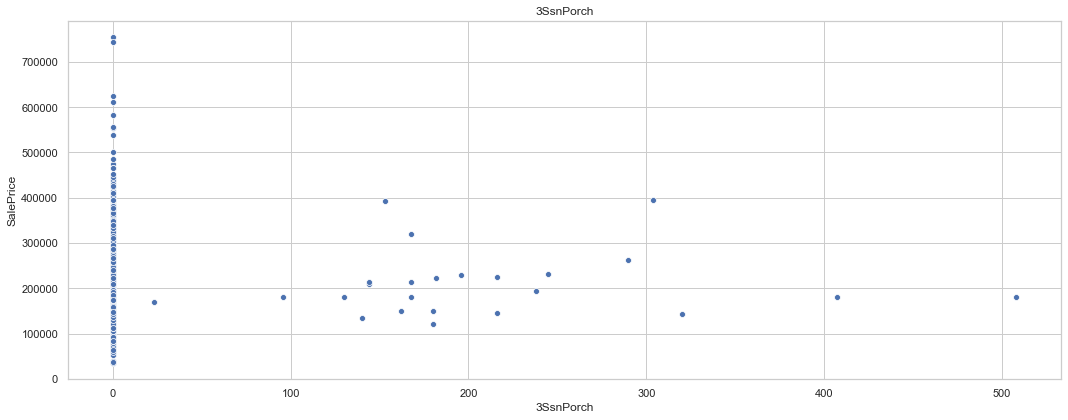

None

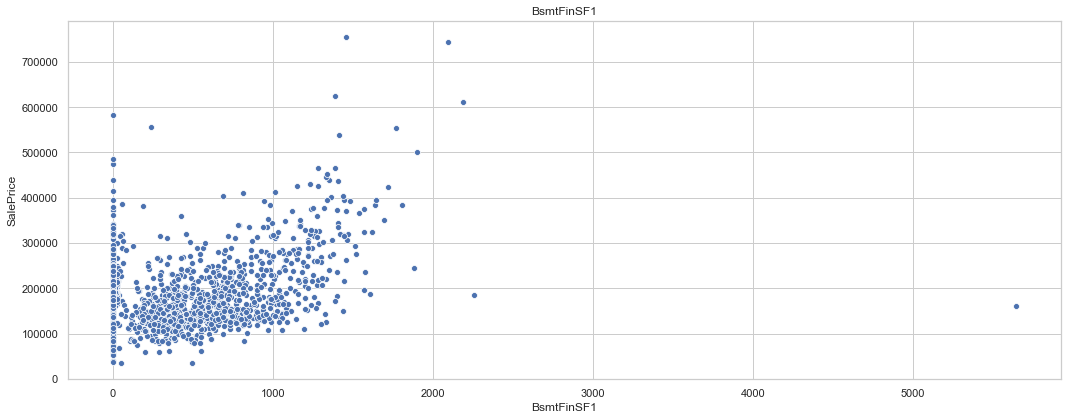

None

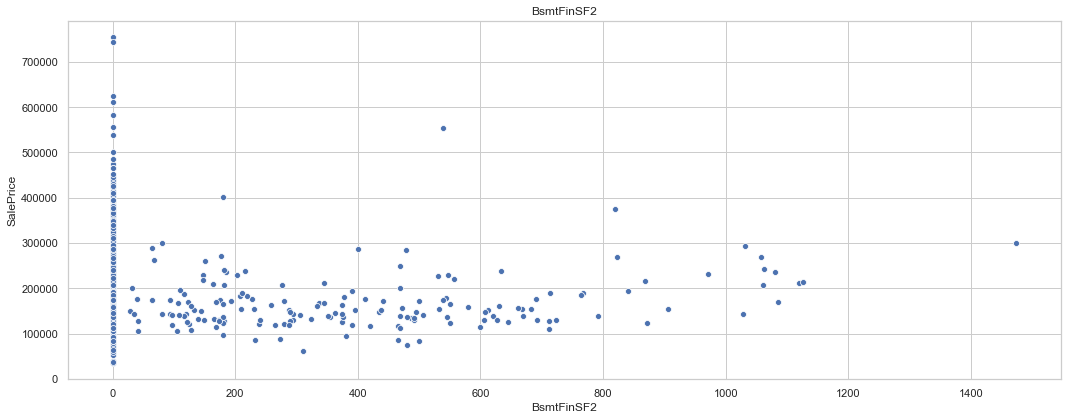

None

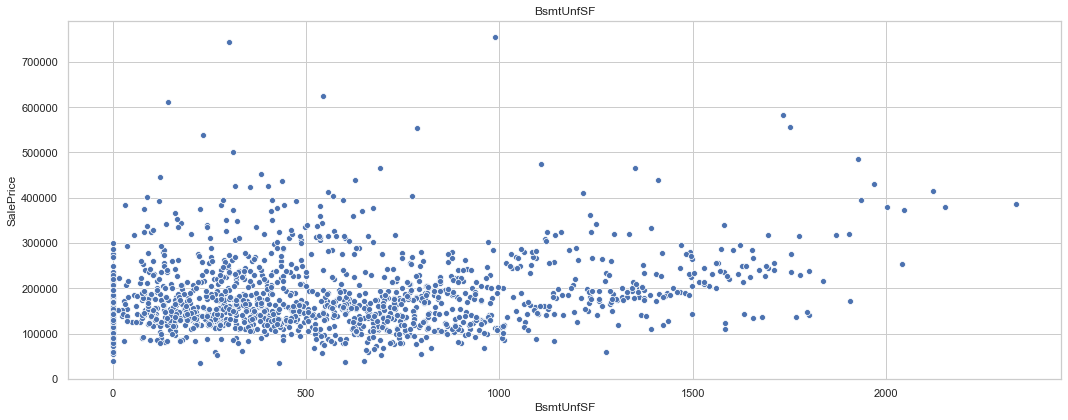

None

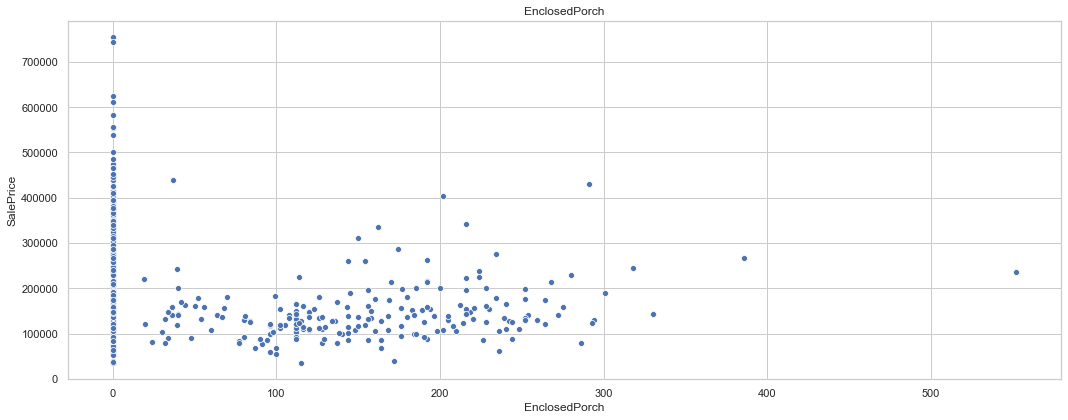

None

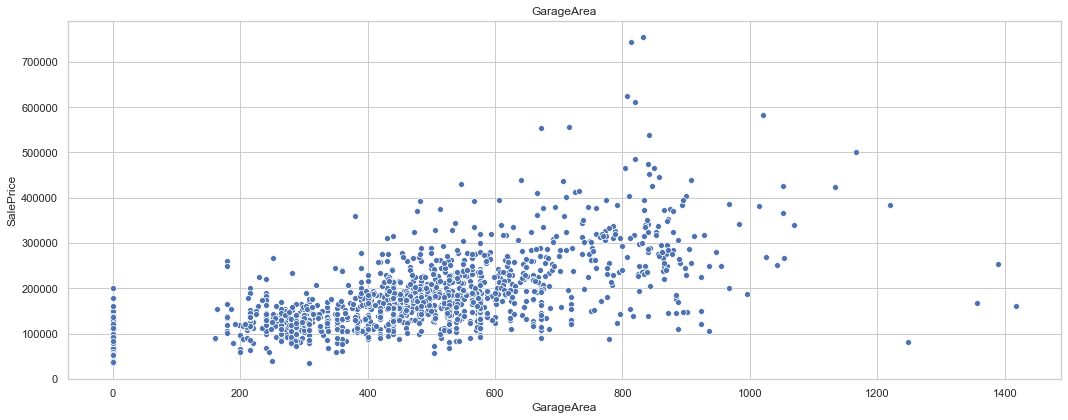

None

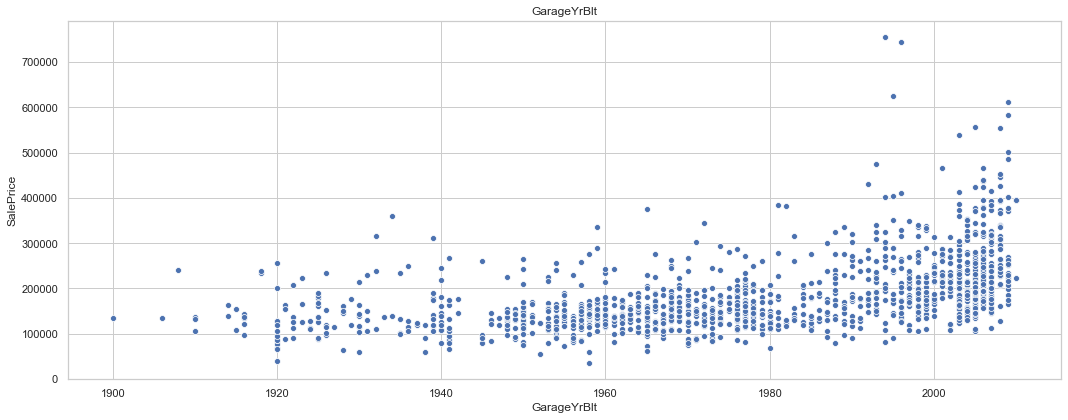

None

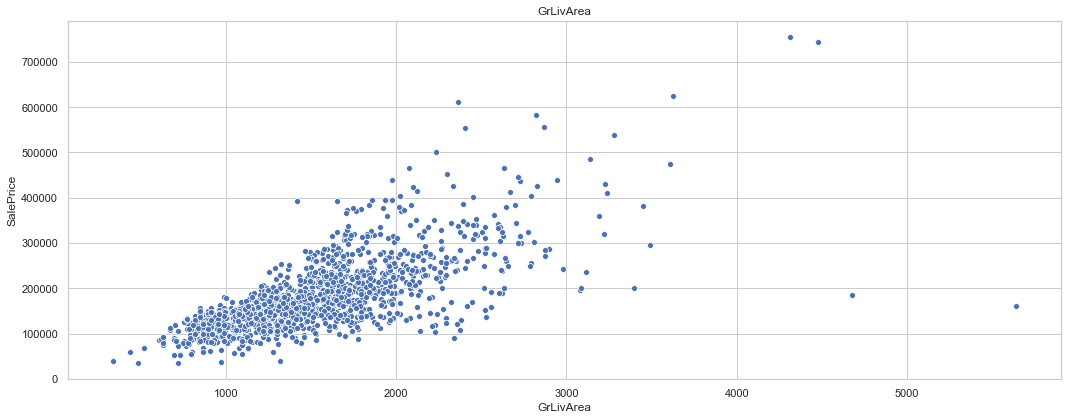

None

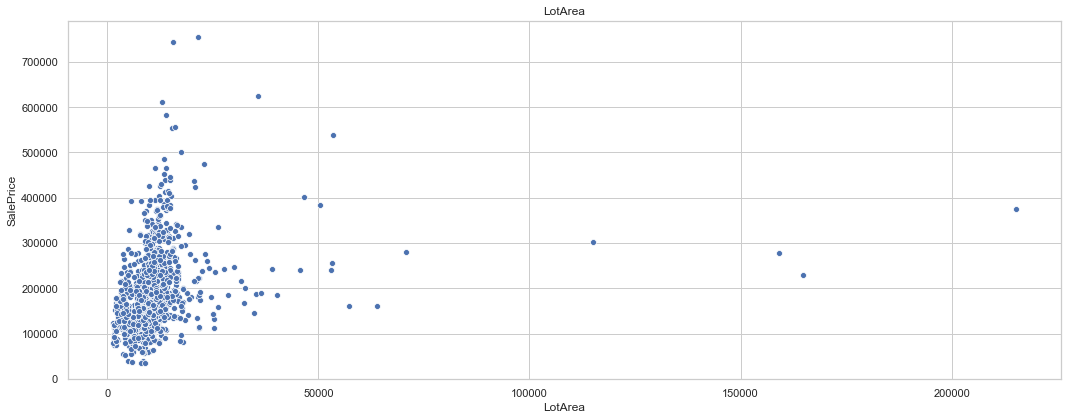

None

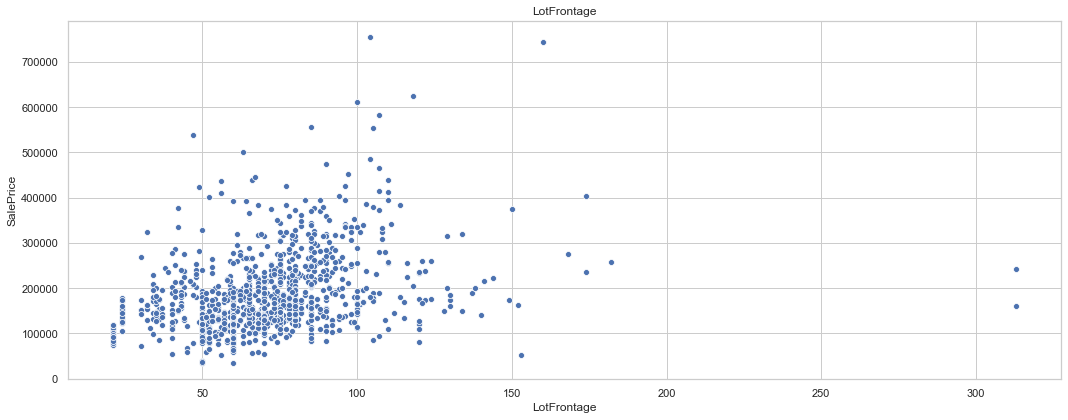

None

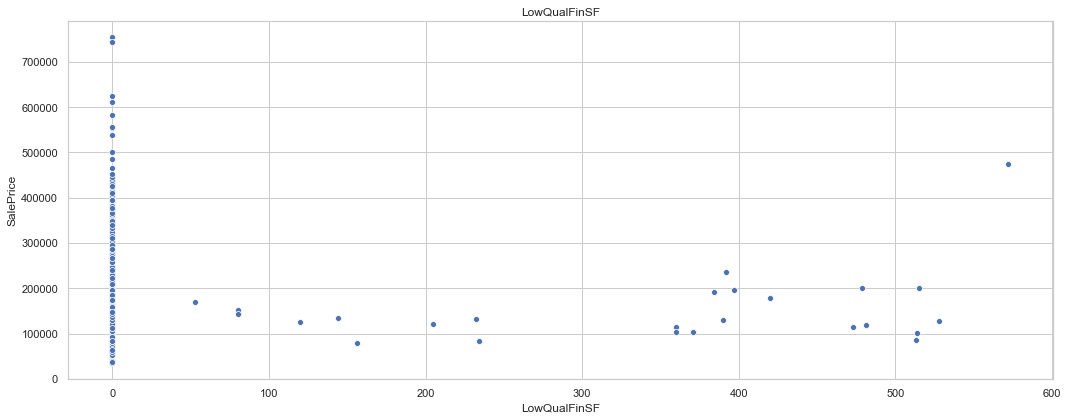

None

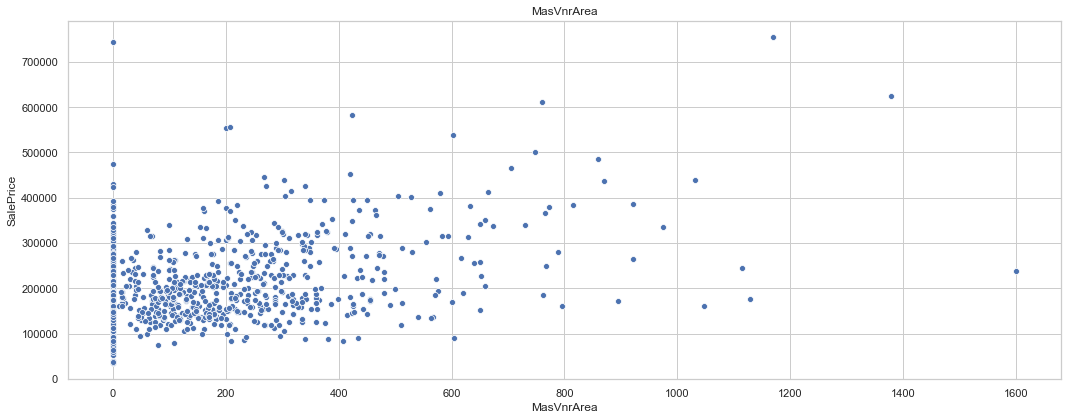

None

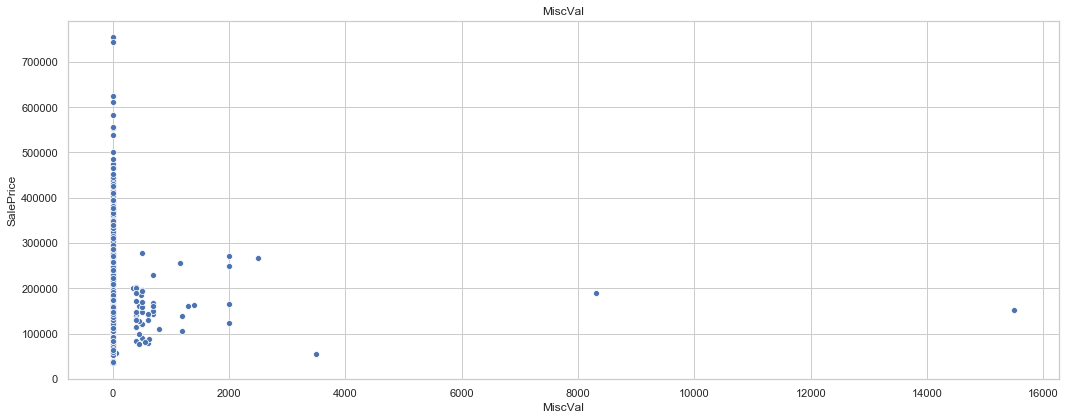

None

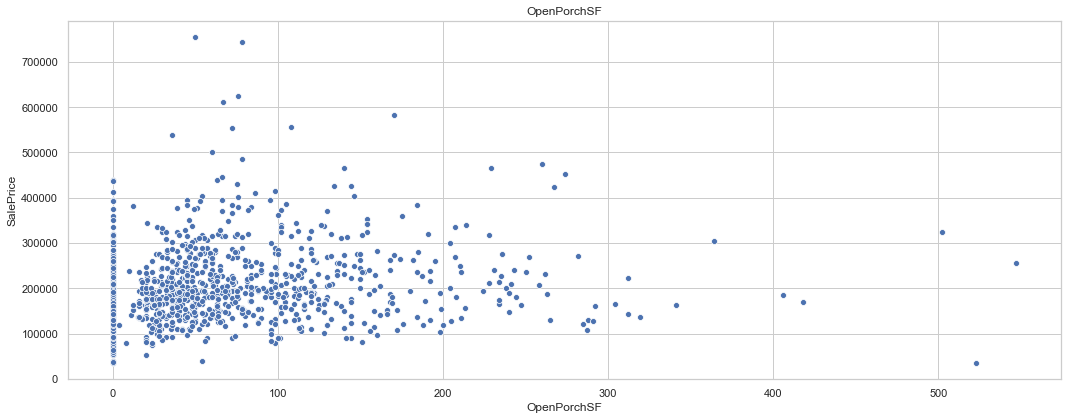

None

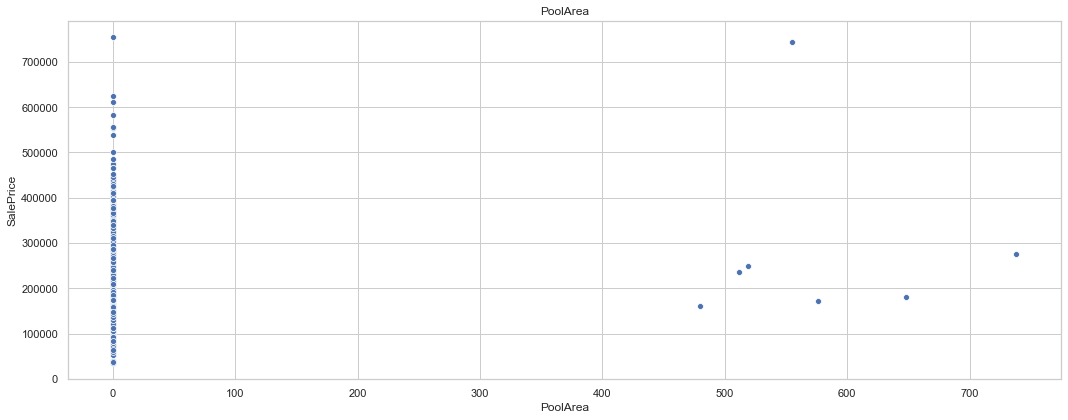

None

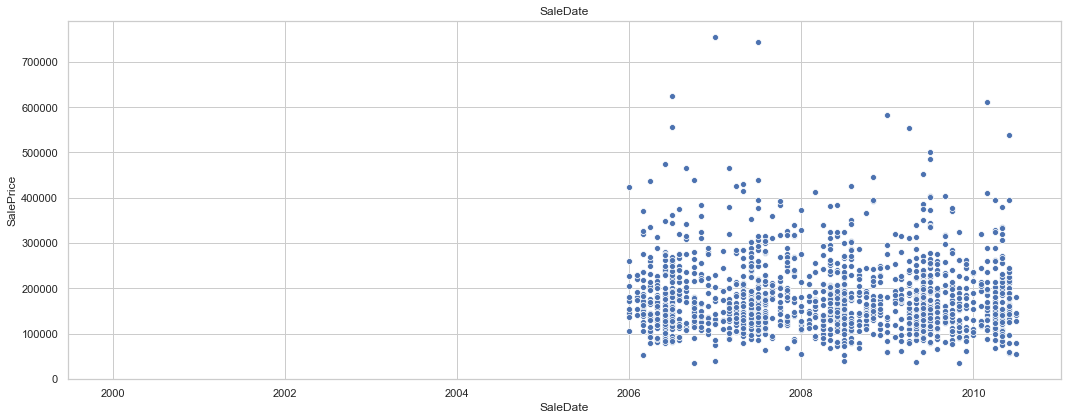

None

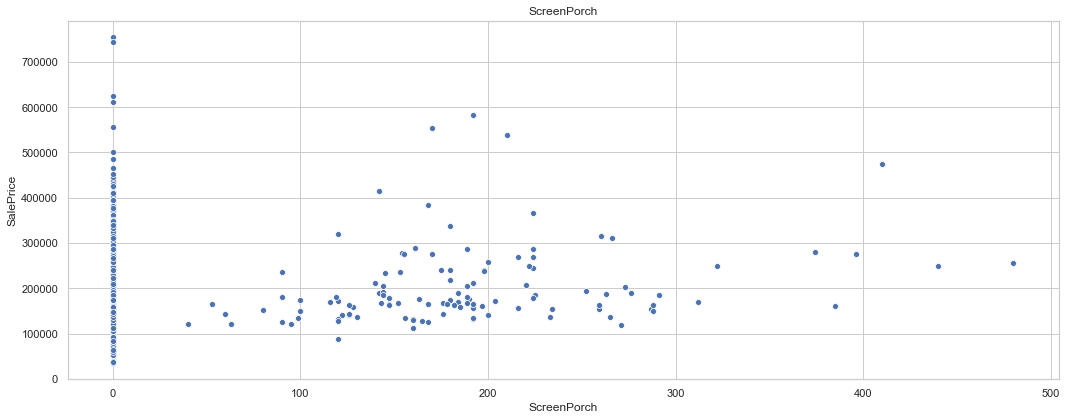

None

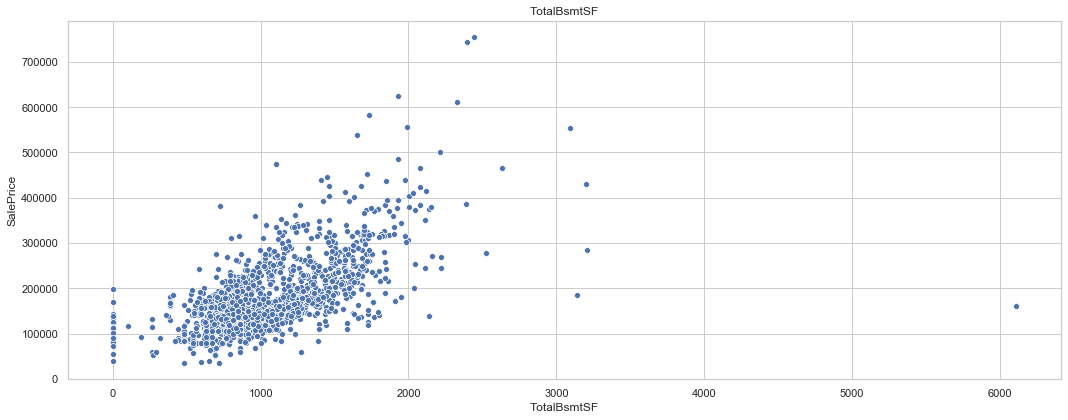

None

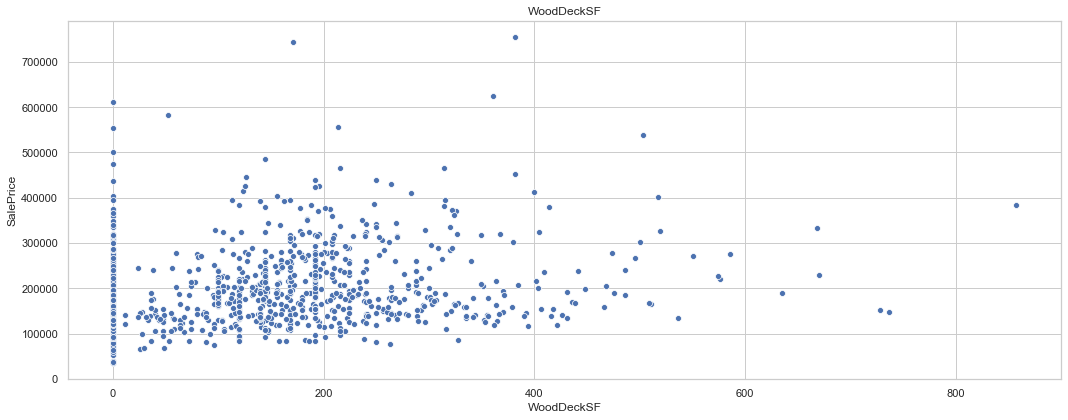

None

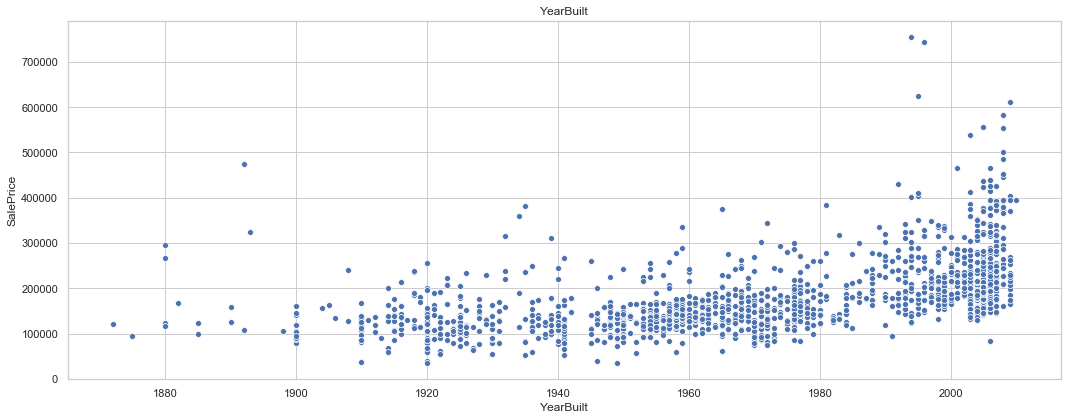

None

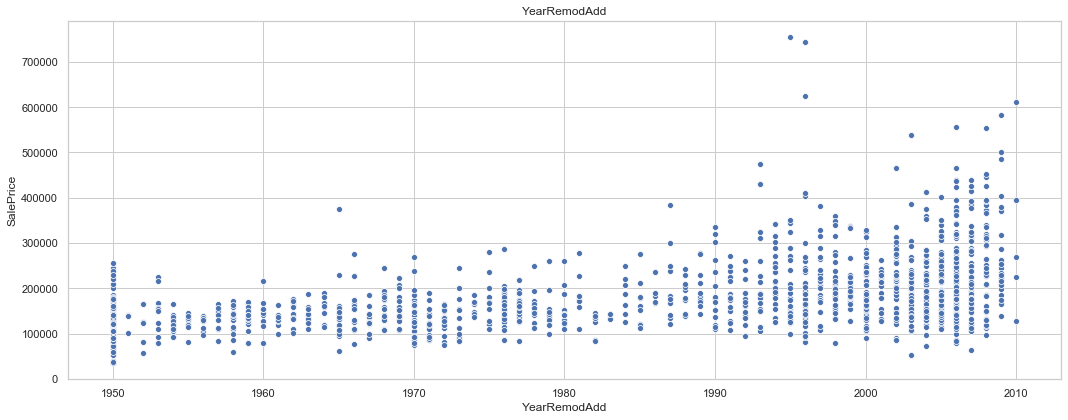

None

In [471]:
for feature in [key for key, value in cols_to_inspect.items() if value == 'scatter']:
    clear_plot()
    
    fig, axarr = plt.subplots(nrows = 1, ncols = 1, figsize=(15,6))
    sns.scatterplot(x=feature, y='SalePrice', data=train_set, ax=axarr).set(title=feature)
    
    fig.tight_layout()
    display(plt.show())

#### Boxplots

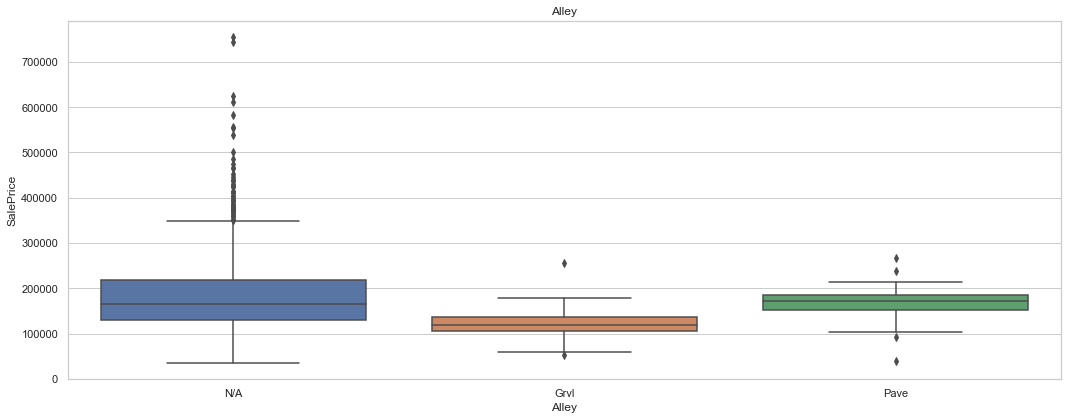

None

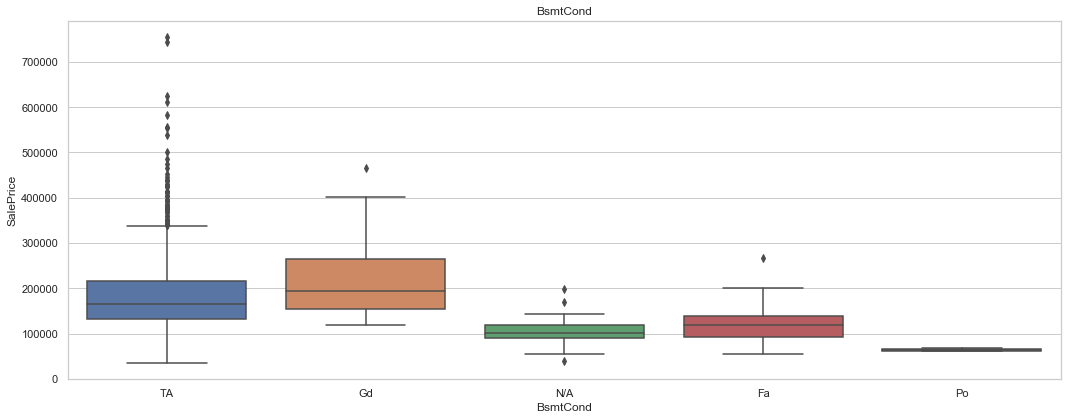

None

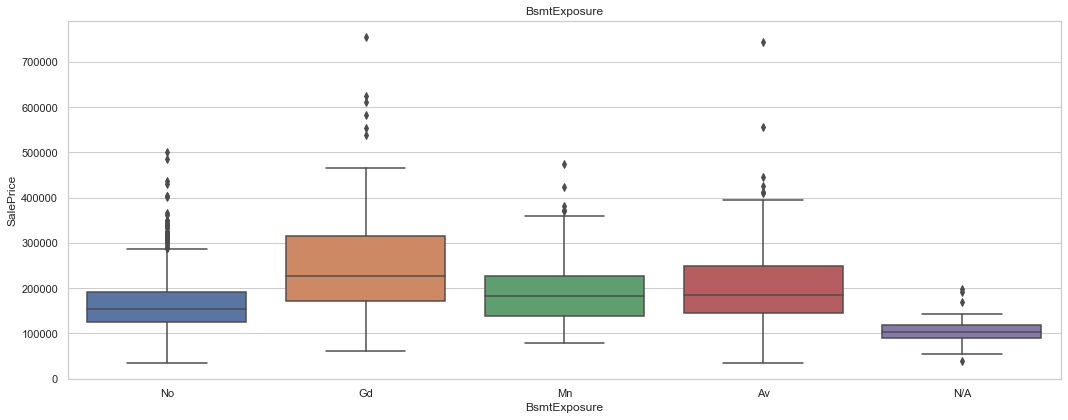

None

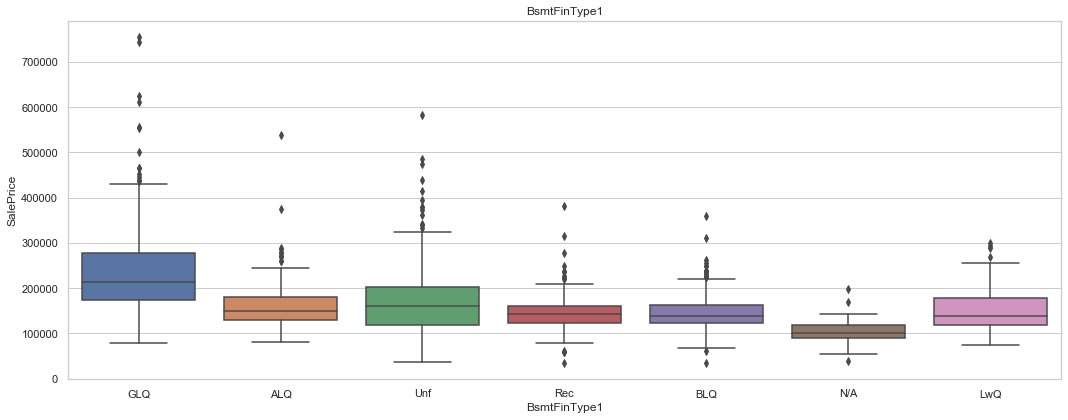

None

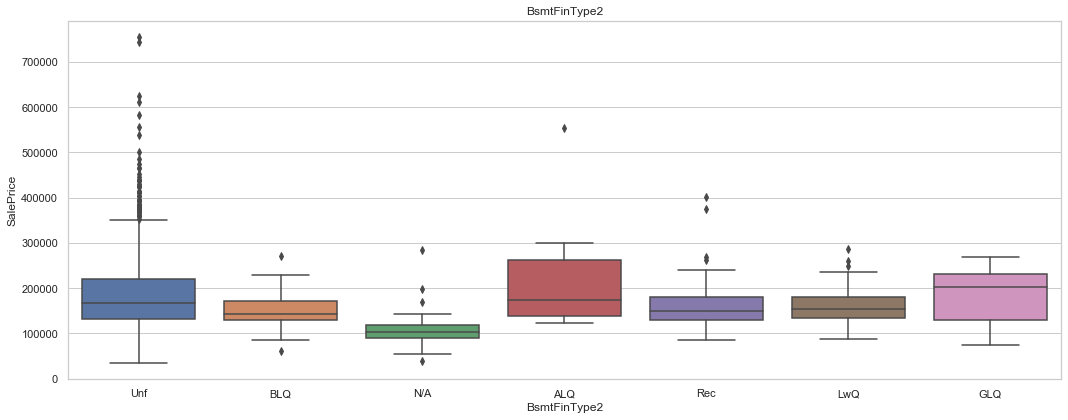

None

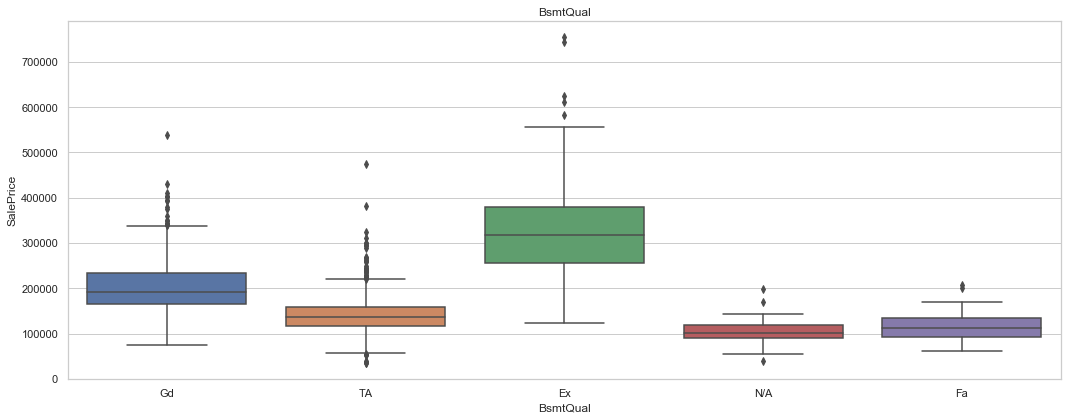

None

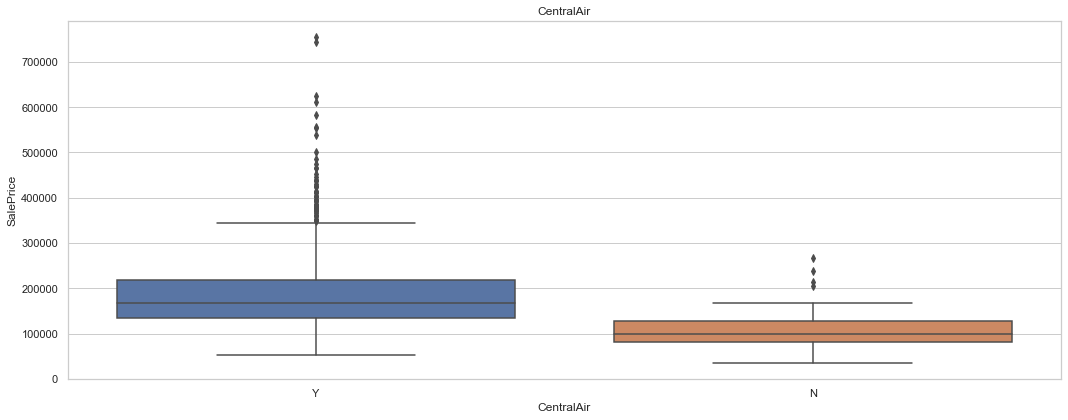

None

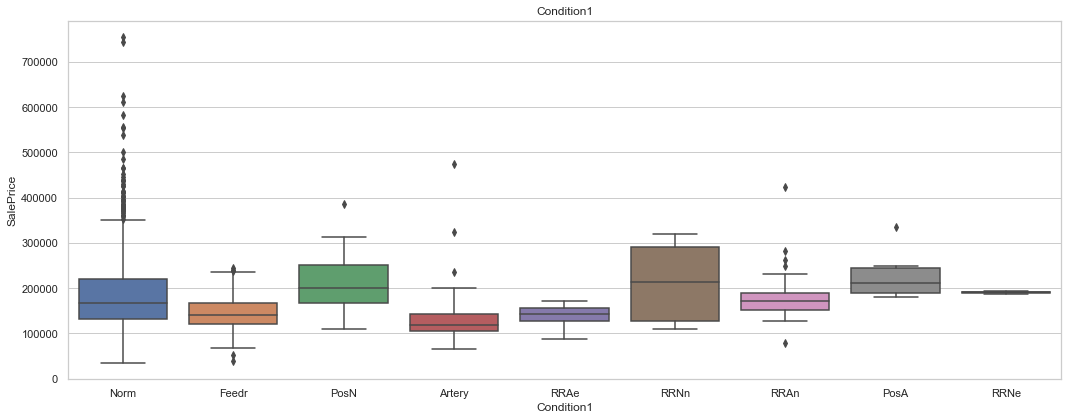

None

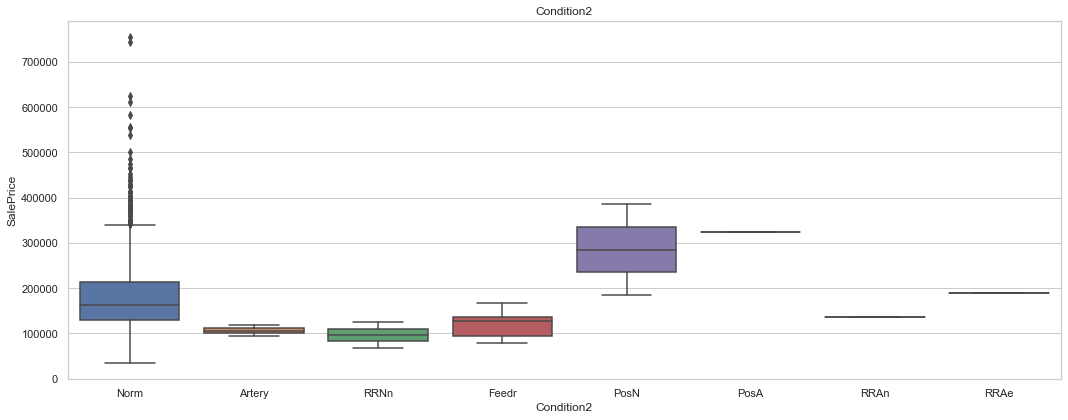

None

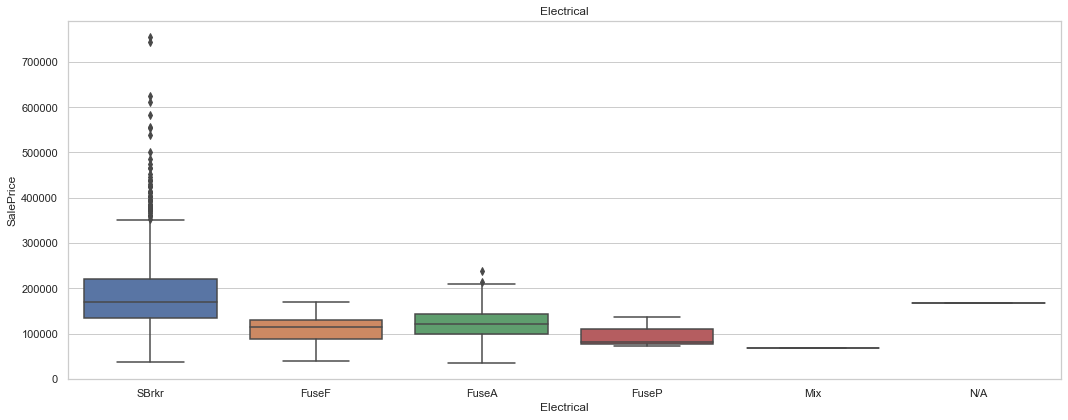

None

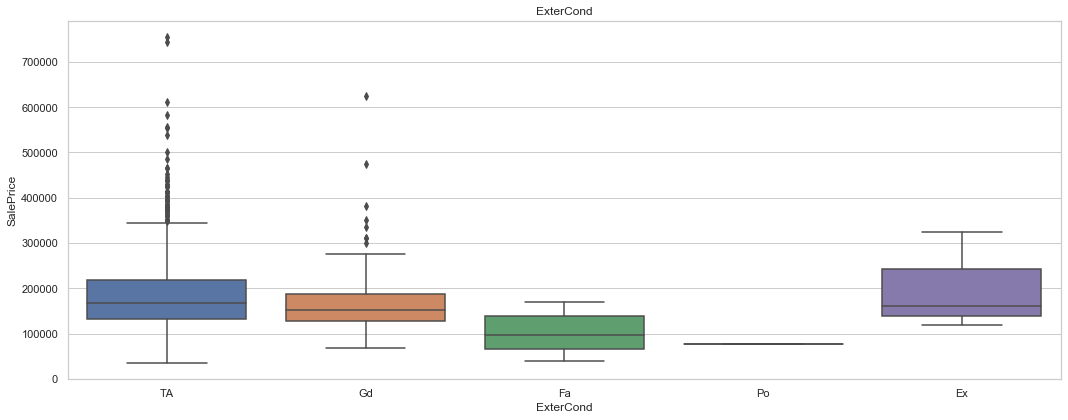

None

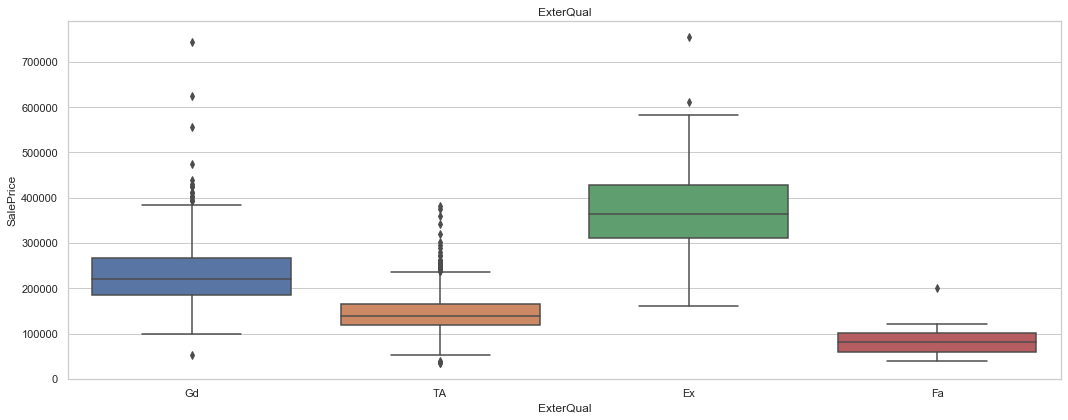

None

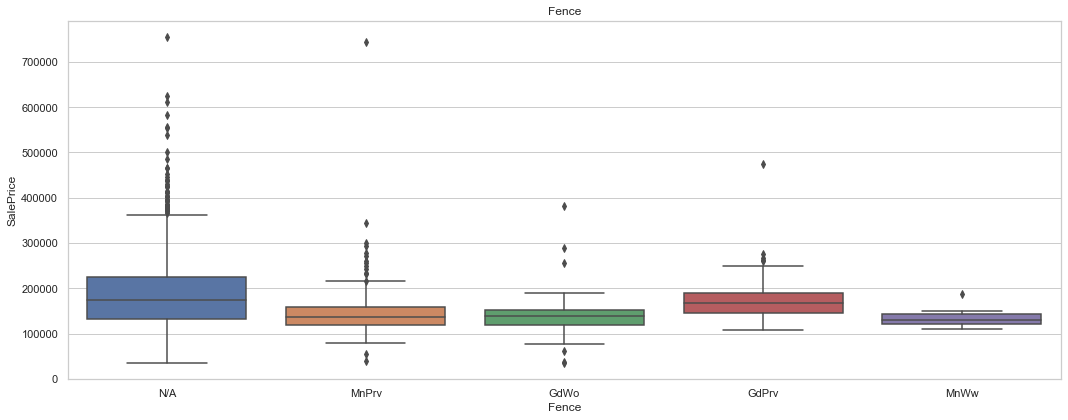

None

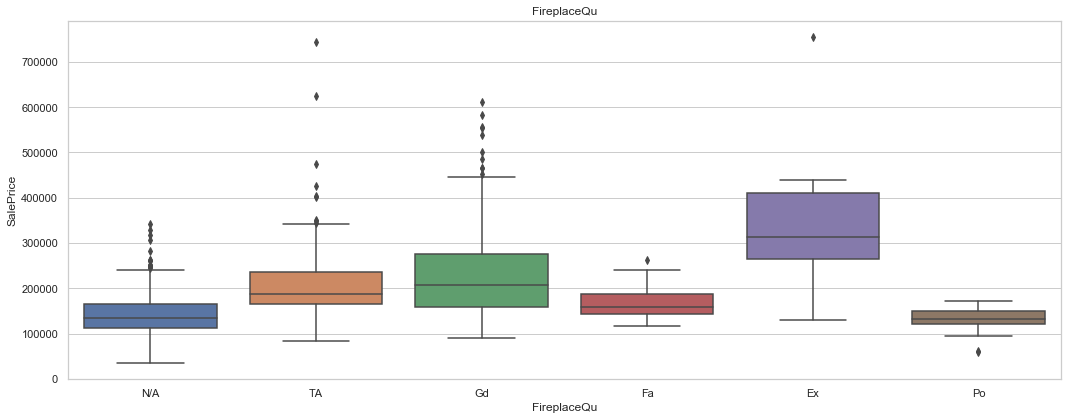

None

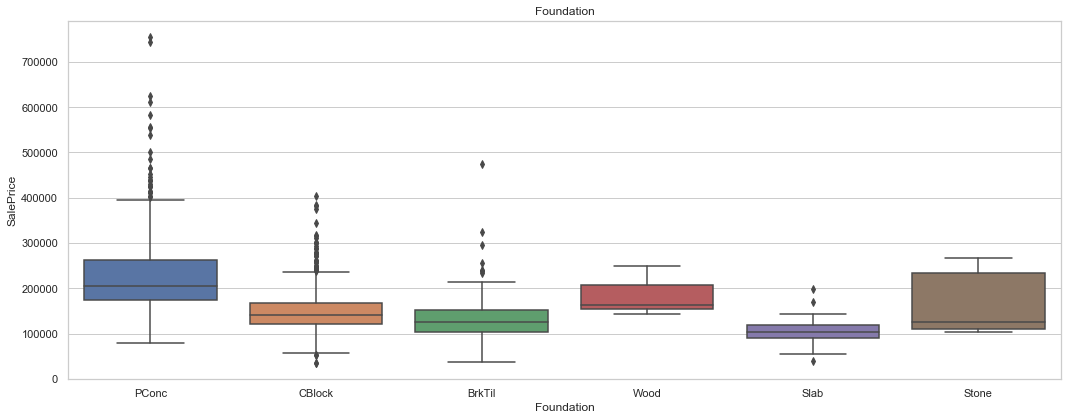

None

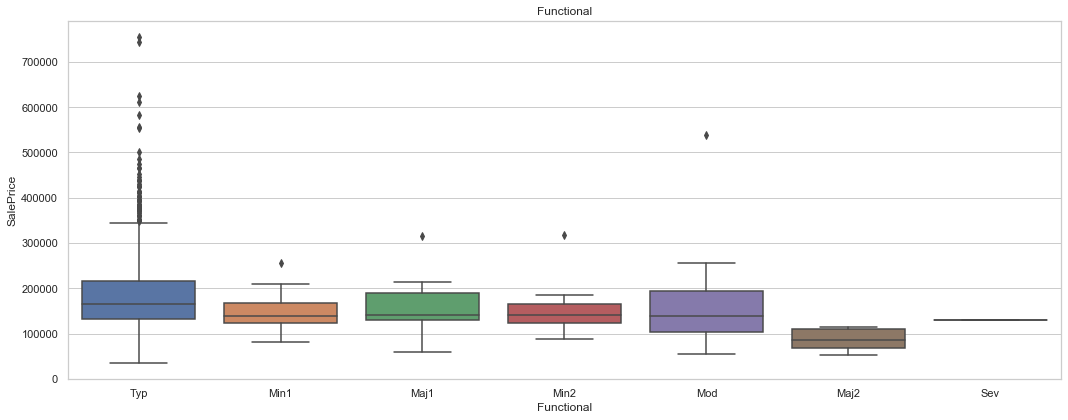

None

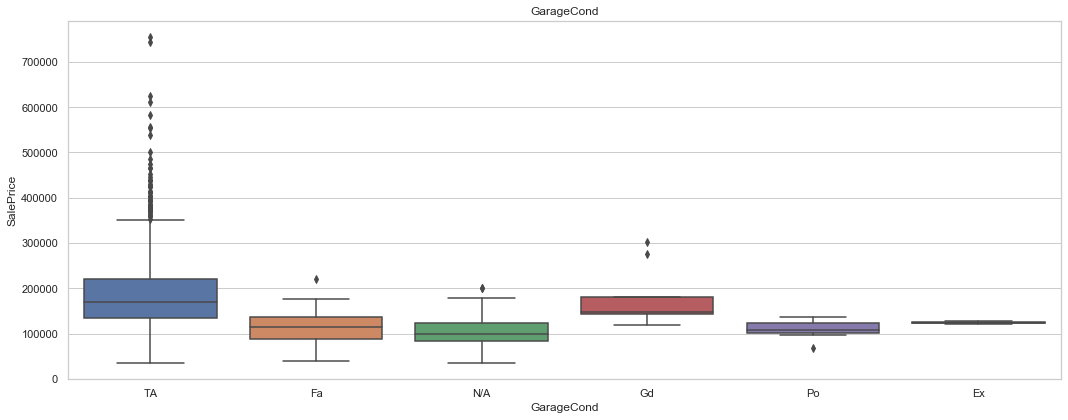

None

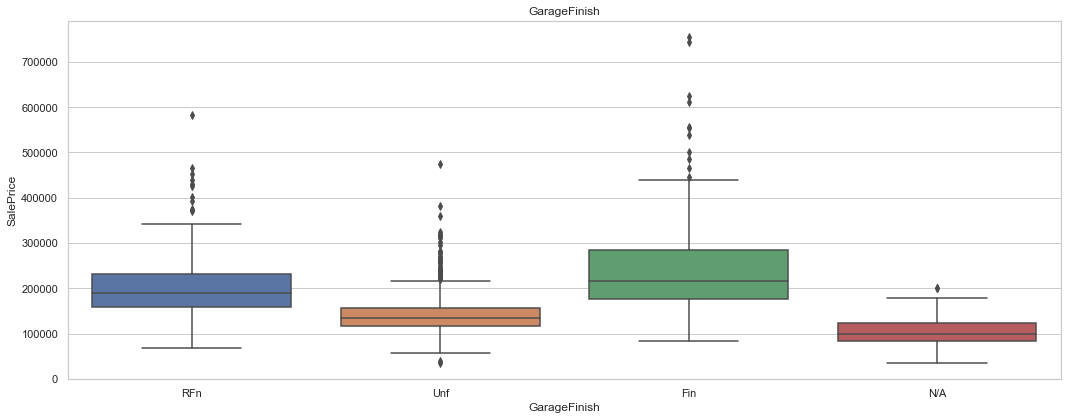

None

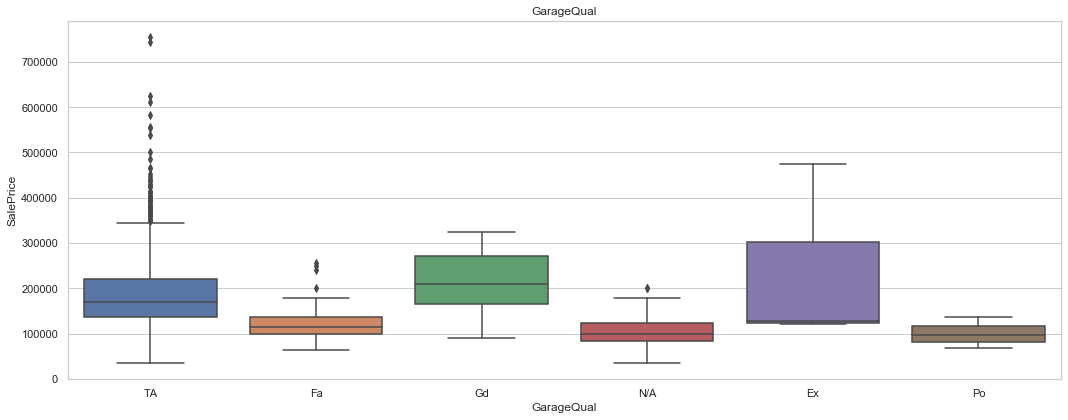

None

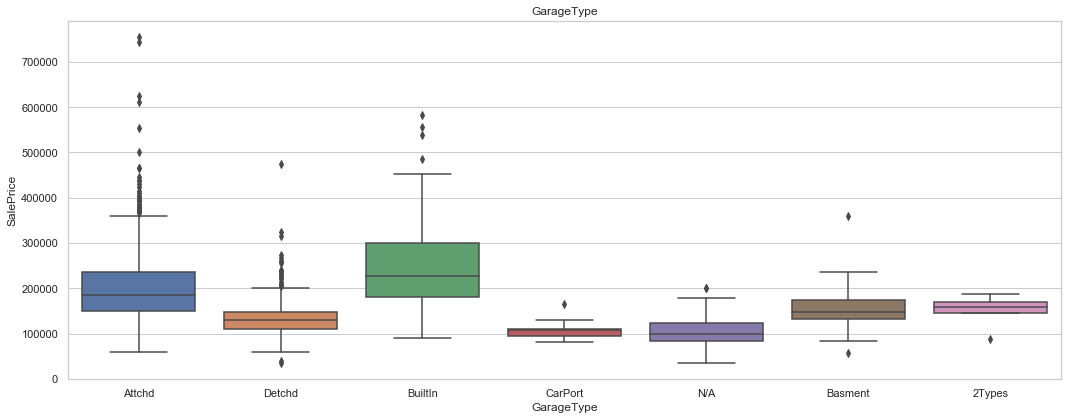

None

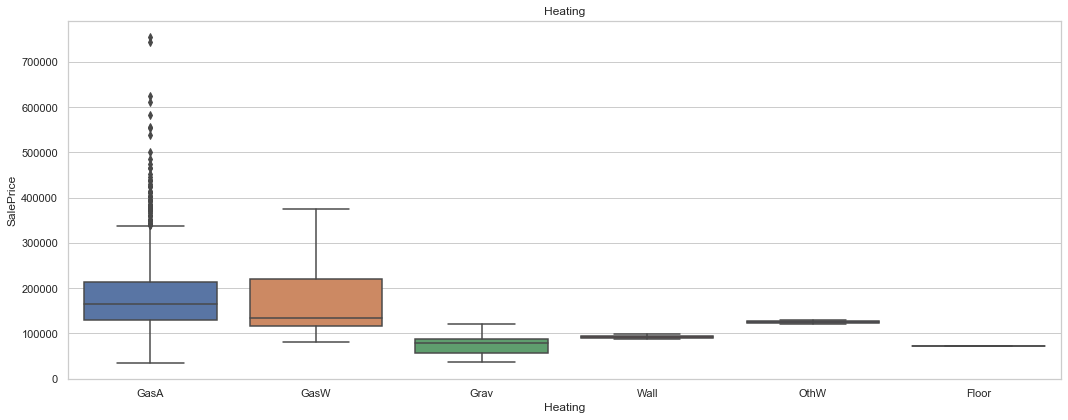

None

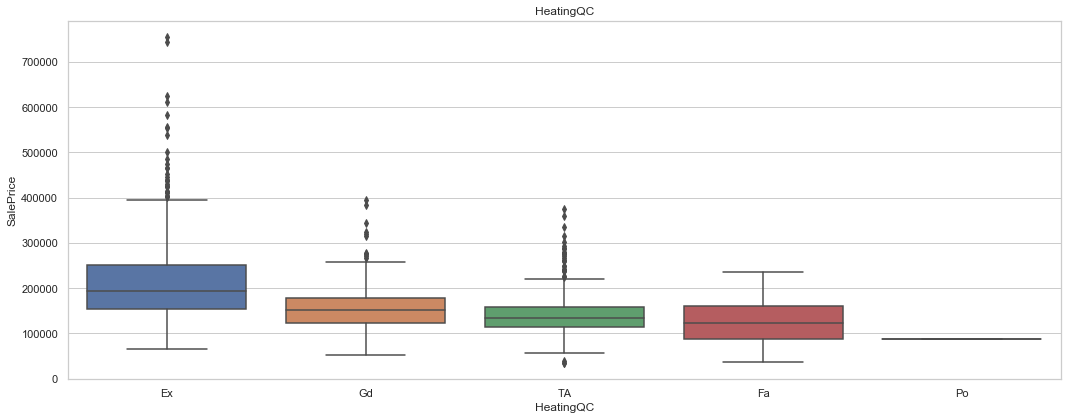

None

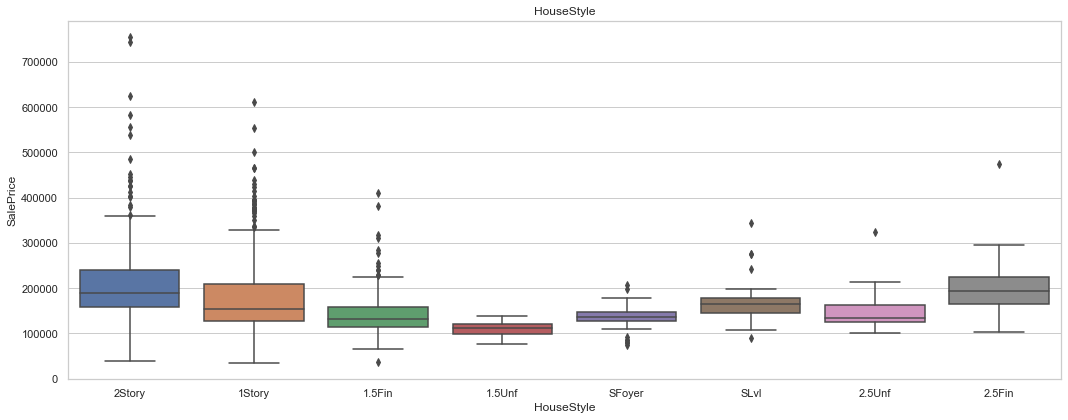

None

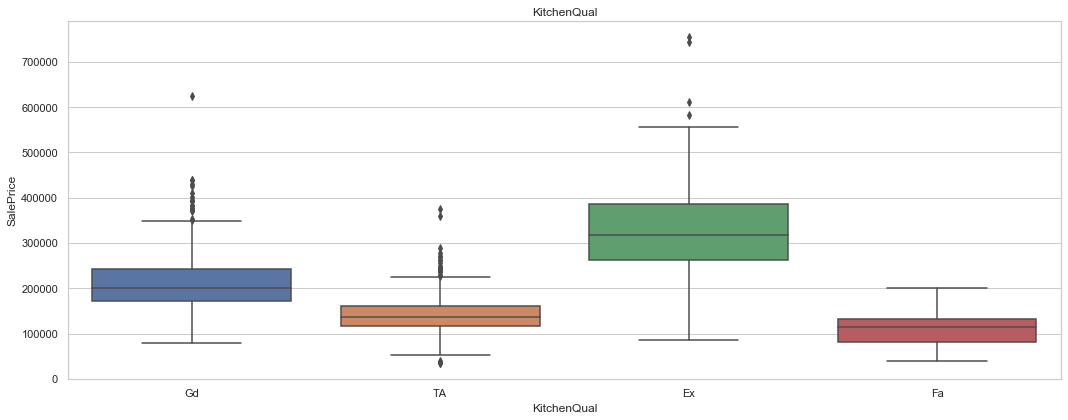

None

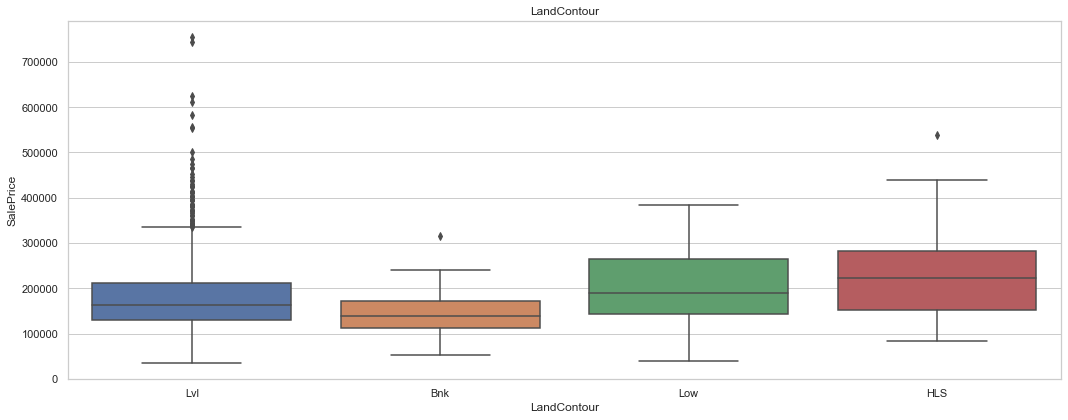

None

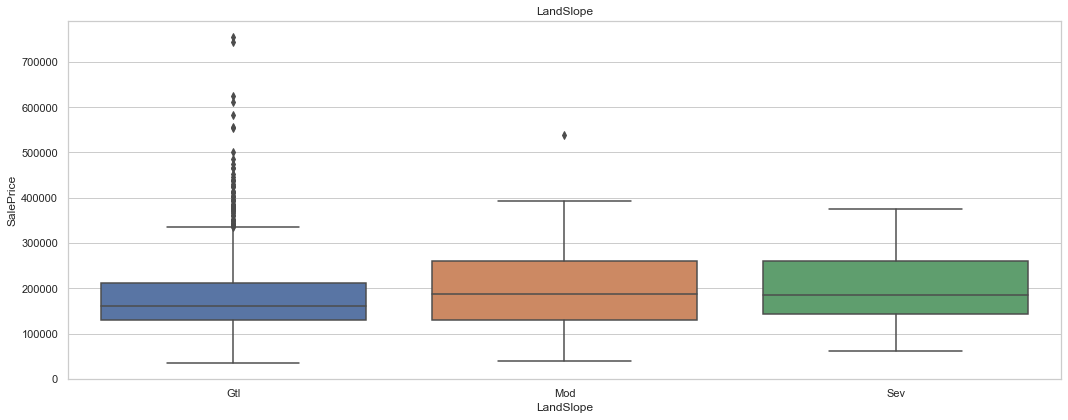

None

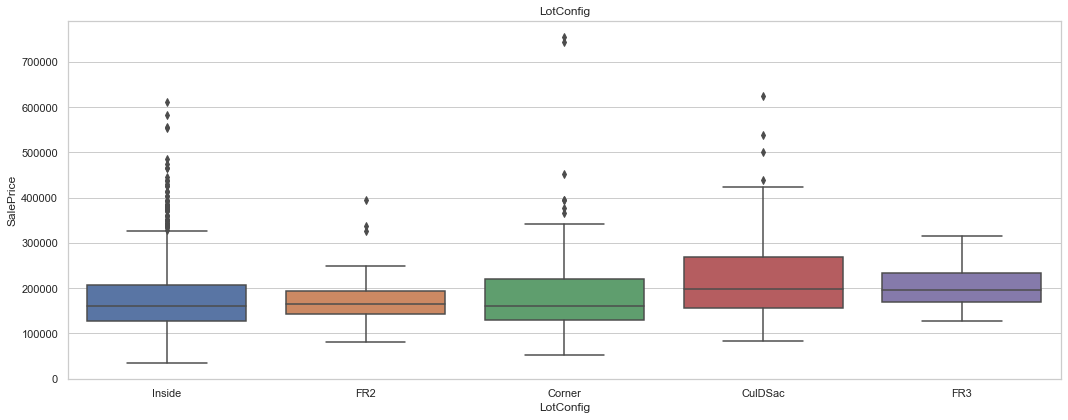

None

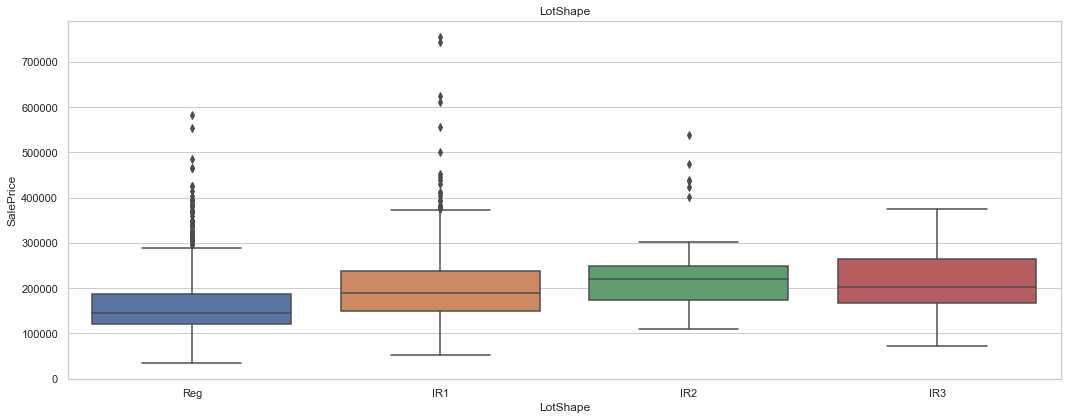

None

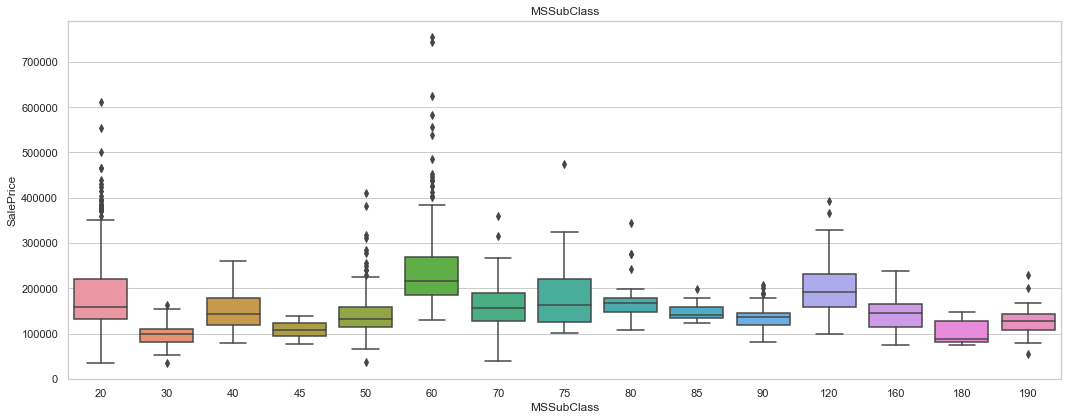

None

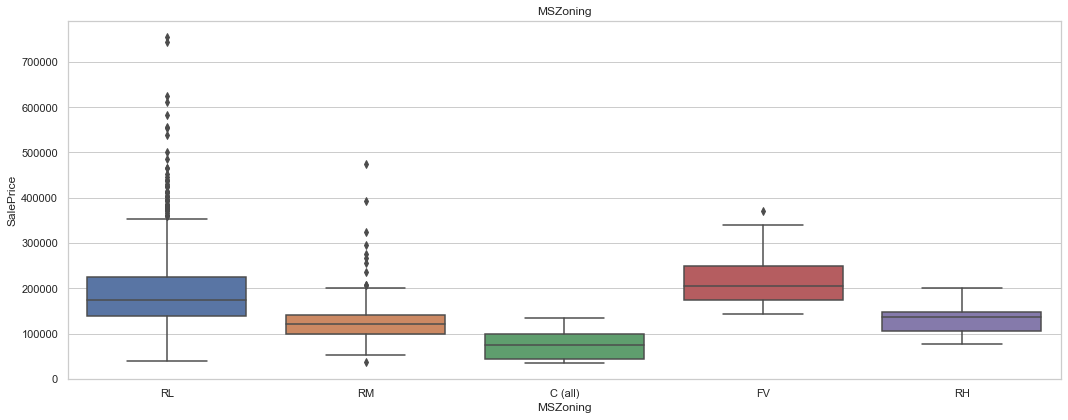

None

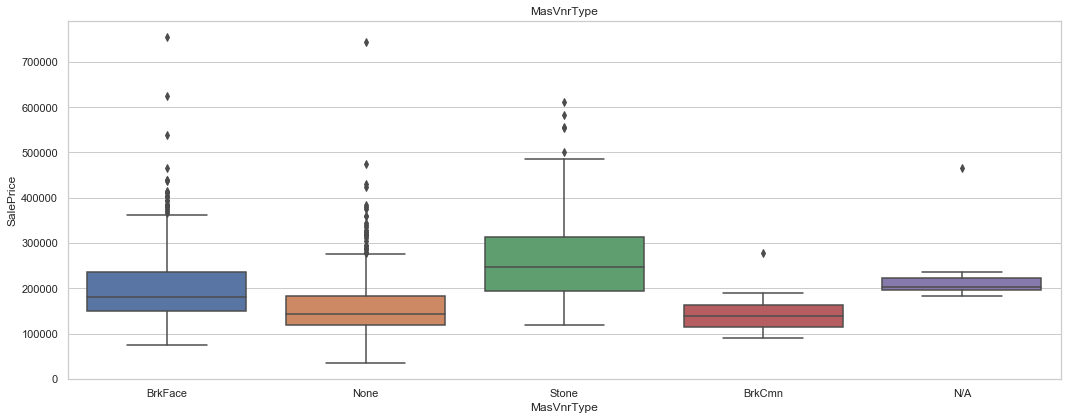

None

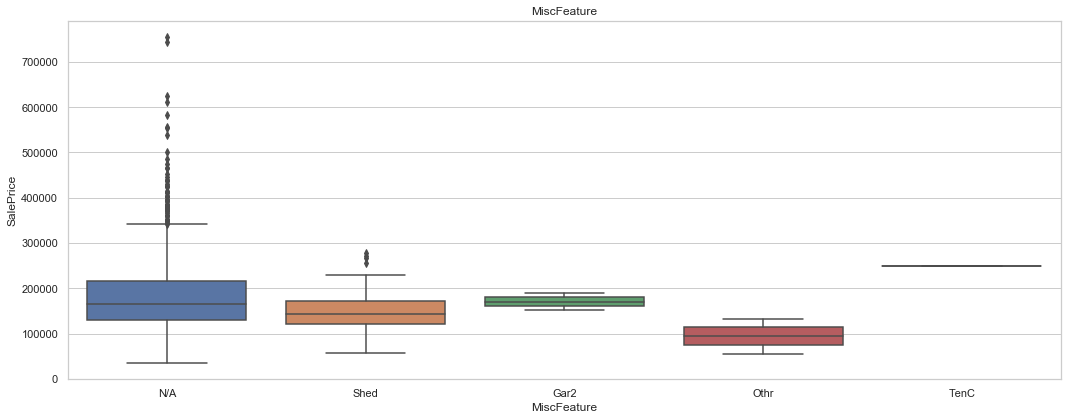

None

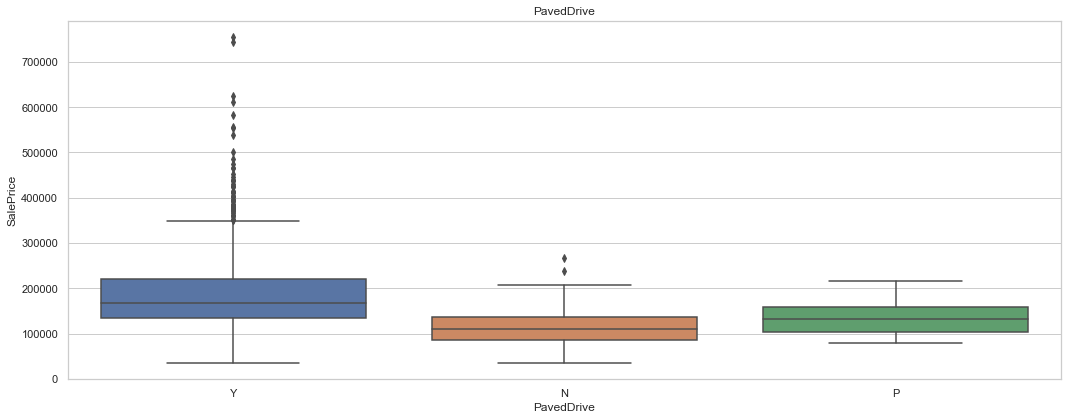

None

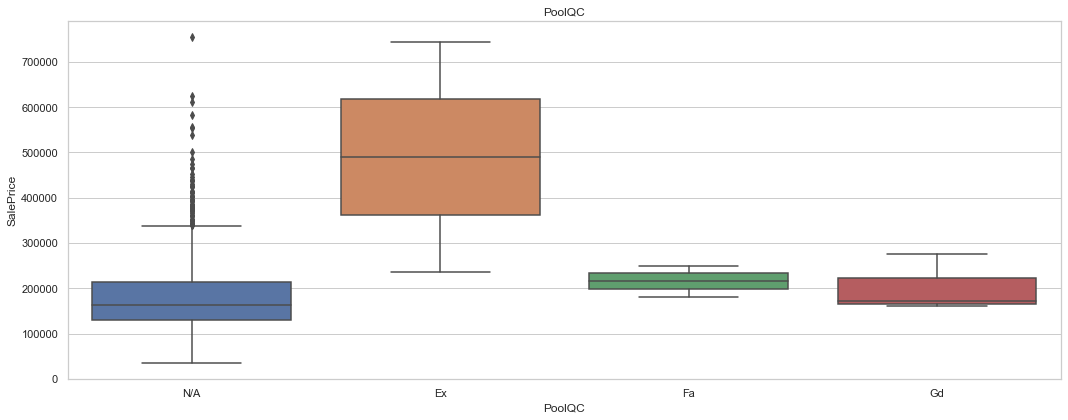

None

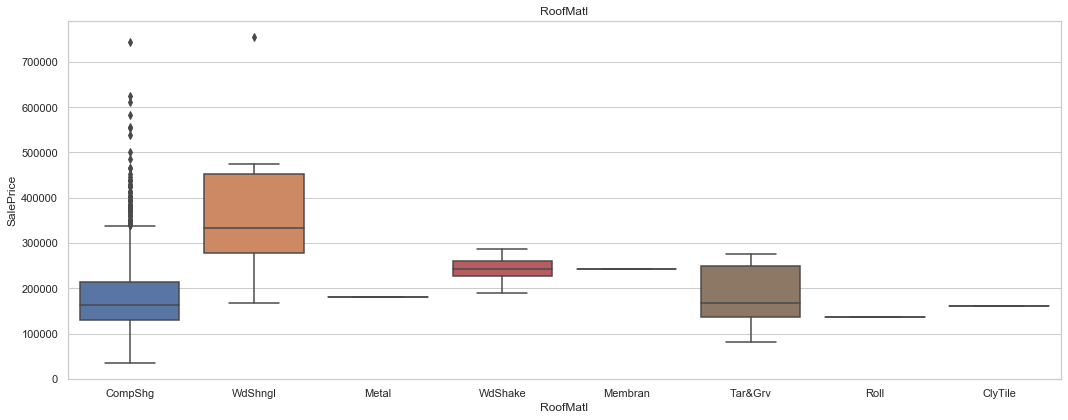

None

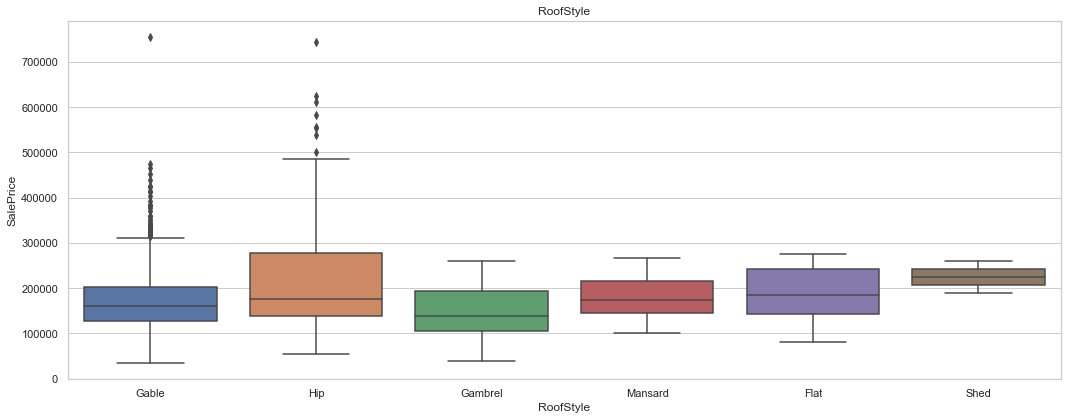

None

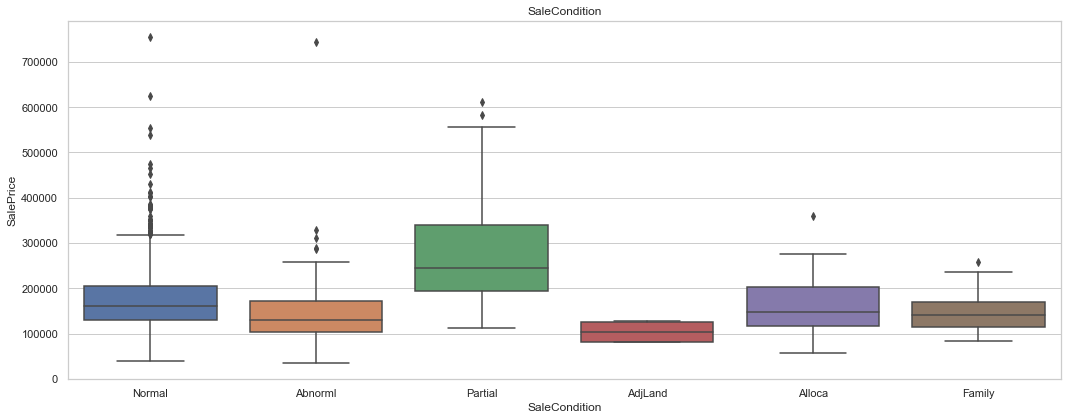

None

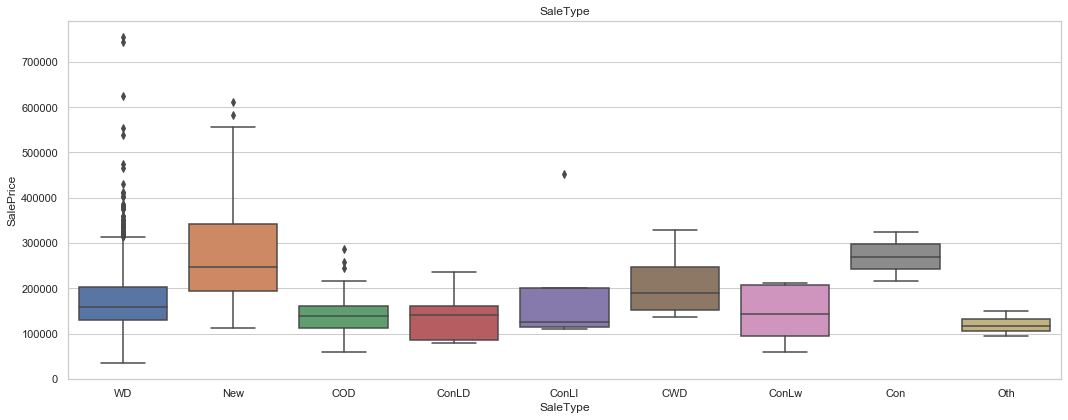

None

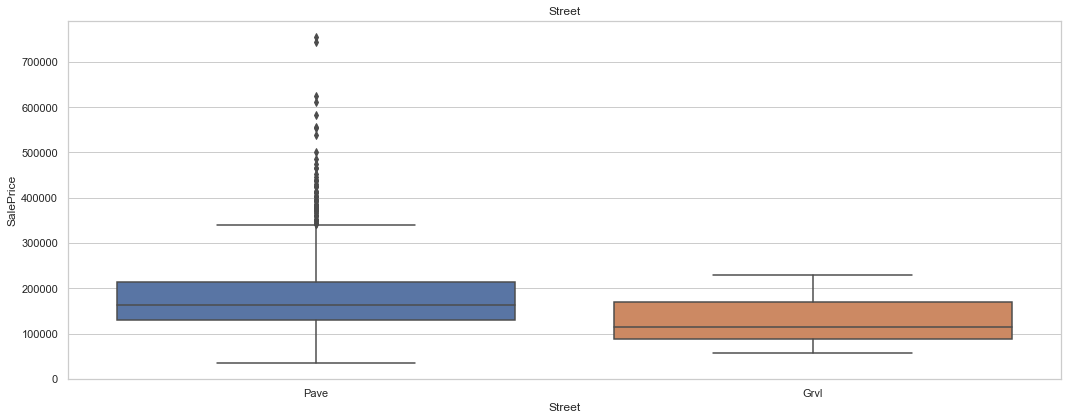

None

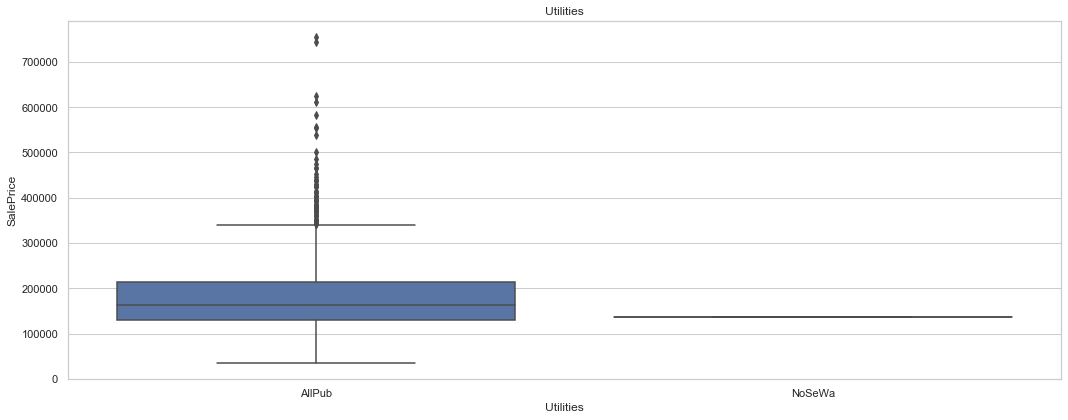

None

In [472]:
for feature in [key for key, value in cols_to_inspect.items() if value == 'boxplot']:
    clear_plot()
    
    boxTranSetData = train_set[[feature, 'SalePrice']].fillna('N/A')
    fig, axarr = plt.subplots(nrows = 1, ncols = 1, figsize=(15,6))
    sns.boxplot(x=feature, y='SalePrice', data=boxTranSetData, ax=axarr).set(title=feature)
    
    fig.tight_layout()
    display(plt.show())

#### Mean-Median: Look at the mean, median, max, and min of columns with a lot of categories to see if it makes a difference

In [473]:
for feature in [key for key, value in cols_to_inspect.items() if value == 'mean-median']:
    featureFacts = train_set[[feature, 'SalePrice']]
    featureFacts = featureFacts.groupby(feature).agg([np.mean, np.median, np.min, np.max]).reset_index()
    display(featureFacts.sort_values(('SalePrice', 'mean'), ascending=False))

Exterior1st      SalePrice                          
                         mean    median    amin    amax
7      ImStucc  262000.000000  262000.0  262000  262000
10       Stone  258500.000000  258500.0  230000  287000
5      CemntBd  231690.655738  236500.0   75000  556581
12     VinylSd  213732.900971  200000.0   37900  611657
3      BrkFace  194573.000000  165750.0   40000  430000
9      Plywood  175942.379630  167450.0   82500  345000
6      HdBoard  163077.450450  149900.0   83000  755000
11      Stucco  162990.000000  144000.0   58500  381000
14     WdShing  150655.076923  128700.0   87000  385000
13     Wd Sdng  149841.645631  138943.5   34900  745000
8      MetalSd  149422.177273  139000.0   62383  392000
0      AsbShng  107385.550000  108000.0   35311  165500
4       CBlock  105000.000000  105000.0  105000  105000
1      AsphShn  100000.000000  100000.0  100000  100000
2      BrkComm   71000.000000   71000.0   60000   82000

Exterior2nd      SalePrice                          
                         mean    median    amin    amax
9        Other  319000.000000  319000.0  319000  319000
7      ImStucc  252070.000000  187600.0   88000  745000
5      CmentBd  230093.833333  238750.0   75000  556581
13     VinylSd  214432.460317  200070.5   37900  611657
3      BrkFace  195818.000000  160000.0   40000  430000
10     Plywood  168112.387324  160750.0   76500  320000
6      HdBoard  167661.565217  155000.0   83000  755000
15     Wd Shng  161328.947368  138225.0   55000  538000
11       Stone  158224.800000  177000.0   90000  230000
12      Stucco  155905.153846  142000.0   58500  381000
8      MetalSd  149803.172897  138750.0   62383  392000
14     Wd Sdng  148386.065990  138000.0   34900  475000
1      AsphShn  138000.000000  139000.0  100000  175000
2      Brk Cmn  126714.285714  147000.0   60000  155000
0      AsbShng  114060.550000  111000.0   35311  225000
4       CBlock  105000.000000  105000.0  105000  105000

Neighborhood      SalePrice                        
                          mean  median    amin    amax
15      NoRidge  335295.317073  301500  190000  755000
16      NridgHt  316270.623377  315000  154000  611657
22      StoneBr  310499.000000  278000  170000  556581
23       Timber  242247.447368  228475  137500  378500
24      Veenker  238772.727273  218000  162500  385000
21      Somerst  225379.837209  225500  144152  423000
4       ClearCr  212565.428571  200250  130000  328000
6       Crawfor  210624.725490  200624   90350  392500
5       CollgCr  197965.773333  197200  110000  424870
0       Blmngtn  194870.882353  191000  159895  264561
8       Gilbert  192854.506329  181000  141000  377500
14       NWAmes  189050.068493  182900   82500  299800
20      SawyerW  186555.796610  179900   76000  320000
11      Mitchel  156270.122449  153500   84500  271000
12        NAmes  145847.080000  140000   87500  345000
13      NPkVill  142694.444444  146000  127500  155000
18        SWISU  142591.360000  139500   60000  200000
1       Blueste  137500.000000  137500  124000  151000
19       Sawyer  136793.135135  135000   62383  190000
17      OldTown  128225.300885  119000   37900  475000
7       Edwards  128219.700000  121750   58500  320000
3       BrkSide  124834.051724  124300   39300  223500
2        BrDale  104493.750000  106000   83000  125000
9        IDOTRR  100123.783784  103000   34900  169500
10      MeadowV   98576.470588   88000   75000  151400

### Conclusions

### Both Scatter and Boxplots

#### BedroomAbGr (Bedrooms above grade - does NOT include basement bedrooms)
Homes with 3 and 4 bedrooms add the most value and at 5 it starts diminishing. There are a lot of outliers with 2, 3, and 4 bedrooms but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### BsmtFullBath (Basement full bathrooms)
Homes with 1 and 2 basement full bathrooms add value and at 3 it starts to diminish. There are a lot of outliers with 0 and 1 basement full bathrooms but it is above the upper whisker which means that the outliers indicate a higher SalePrice and the fact that the outliers are also present on 0 basement full baths indicates that bathrooms in the basement don’t add a lot to the SalePrice

#### BsmtHalfBath (Basement half bathrooms)
Homes with a basement half bathrooms do not appear to be a good predictor of SalePrice

#### Fireplaces (Number of fireplaces)
Homes increase with the more fireplaces they have. There are a lot of outliers with 0, 1, and 2 fireplaces but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### FullBath (Full bathrooms above grade)
Homes increase with the more full baths they have. There are a lot of outliers with 1 and 2 full baths but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### GarageCars (Size of garage in car capacity)
Homes increase with the more cars that can fit in the garage. There are a lot of outliers with 1, 2, and 3 cars but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### HalfBath (Half baths above grade)
Homes increase with the with 1 half bath as opposed to 0, but there is a diminishing return when there are 2 half baths . There are a lot of outliers with 0 and 1 half baths but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### KitchenAbvGr (Kitchens above grade)
Homes increase when there is at least 1 kitchen and there is not a lot of value added when additional kitchens exist within a house. If there are no kitchens the SalePrice is very low. There are a lot of outliers with homes with 1 kitchen which indicates that linking this to an additional attribute such as KitchenQual is needed to quantify the impact on the SalePrice and the number of kitchens is a poor predictor of SalePrice.

#### OverallCond (Rates the overall condition of the house)
The overall condition is a good predictor of SalePrice from the ratio of 1 to 5 but then it starts diminishing and leveling off from 6 to 8. When the overall condition is 9 it adds a lot of value to the SalePrice. Since there are a lot of outliers, specially at the OverallCond of 5, it indicates this need to be linked to additional features or we can only consider OveralllConds from 1 to 5 as good predictors

#### OverallQual (Rates the overall material and finish of the house)
The overall quality is the strongest predictor for the SalePrice of a home and as the ratio increases from 1 to 10, we can see the SalePrice increase positively. This will be the main feature we want to consider in our model.

#### TotalRmsAbvGrd
The total rooms above grade do appear to add value as it increases but the whiskers get larget the higher it gets and there are a lot of outliers at 4, 5, 6, 7, and 8. This may or may not be good predictor for SalePrice. To better determine we will evaluate the coef to SalePrice

### Scatter Plots

The following features have a positive correlation which indicates they are good predictors for determining the SalePrice
- 1stFlrSF (First Floor square feet)
- GrLivArea (Above grade (ground) living area square feet)
- TotalBsmtSF (Total square feet of basement area)
- GarageArea (Size of garage in square feet)


The following features have no correlation and do not appear to be good predictors of SalePrice
- 2ndFlrSF (Second floor square feet) – some homes have no second floor so we may have to deal with this ater
- 3SsnPorch (Three season porch area in square feet)
- BsmtFinSF1 (Type 1 finished square feet)
- BsmtFinSF2 (Type 2 finished square feet)
- BsmtUnfSF (Unfinished square feet of basement area)
- EnclosedPorch (Enclosed porch area in square feet)
- GarageYrBlt (Year garage was built)
- LotArea (Lot size in square feet) – need to remove outliers to get a better look
- LotFrontage (Linear feet of street connected to property)
- LowQualFinSF (Low quality finished square feet (all floors))
- MasVnrArea (Masonry veneer area in square feet)
- MiscVal ($Value of miscellaneous feature)
- OpenPorchSF (Open porch area in square feet)
- PoolArea (Pool area in square feet)
- SaleDate (combined SaleMo and SaleYr)
- ScreenPorch (Screen porch area in square feet)
- WoodDeckSF (Wood deck area in square feet)
- YearBuilt (Original construction date)
- YearRemodAdd (Remodel date (same as construction date if no remodeling or additions)

### Boxplots

The following features appear to be good predictors of SalePrice and should be considered to add a numeric value to each categorical value as a method to quantify SalePrice:

#### BsmtQual: Evaluates the height of the basement
- NA (No basement) = 0
- Po (Poor) = 1
- Fa (Fair) = 2
- TA (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### CentralAir: Central air conditioning
- N (No) = 1
- Y (Yes) = 2

#### Electrical: Electrical system
- NA (Missing) = 0
- Mix (Mixed) = 1
- FuseP (60 AMP Fuse Box and mostly knob & tube wiring (poor)) = 2
- FuseF (60 AMP Fuse Box and mostly Romex wiring (Fair)) = 3
- FuseA (Fuse Box over 60 AMP and all Romex wiring (Average)) = 4
- SBrkr (Standard Circuit Breakers & Romex) = 5

#### ExterQual: Evaluates the quality of the material on the exterior
- Po (Poor) = 1
- Fa (Fair) = 2
- TA (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### FireplaceQu: Fireplace quality
- Po (Poor) = 1
- NA (No Fireplace) = 2
- Fa (Fair) = 2
- Ta (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### GarageFinish: Interior finish of the garage
- NA (No Garage) = 1
- Unf (Unfinished) = 2
- RFn (Rough Finished) = 3
- Fin (Finished) = 4

#### HeatingQC: Heating quality and condition
- Po (Poor) = 1
- Fa (Fair) = 2
- TA (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### KitchenQual: Kitchen quality
- Po (Poor) = 1
- Fa (Fair) = 2
- TA (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### PoolQC: Pool quality
- Fa (Fair) = 0
- TA (Typical) = 0
- Gd (Good) = 0
- NA (No Pool) = 0
- Ex (Excellent) = 1


#### The following features do not appear to be good predictors of SalePrice:
- Alley: to many outliers on NA
- BsmtCondition
- BsmtExposure
- BsmtFinType1: to many outliers
- BsmtFinType2: to many outliers
- Condition1: no real value seen in plot
- Condition2: no real value seen in plot
- ExterCond
- Fence
- Foundation
- Functional
- GarageCond
- GarageQual
- GarageType
- Heating (HeatingQC is better)
- HouseStyle
- LandContour
- LandSlope
- LotConfig
- LotShape
- MSSubClass
- MSZoning
- MasVnrType
- MiscFeature
- PavedDrive
- PoolQC
- RoofMat
- RoofStyle
- SaleCondition
- SaleType
- Street
- Utilities

#### Check if LotArea is a good predictor after outliers are removed, it appeared it was but the scatter plot is clear due to outliers

This will be done by calculating the outliers using an IQR of 1.5 and 3.0

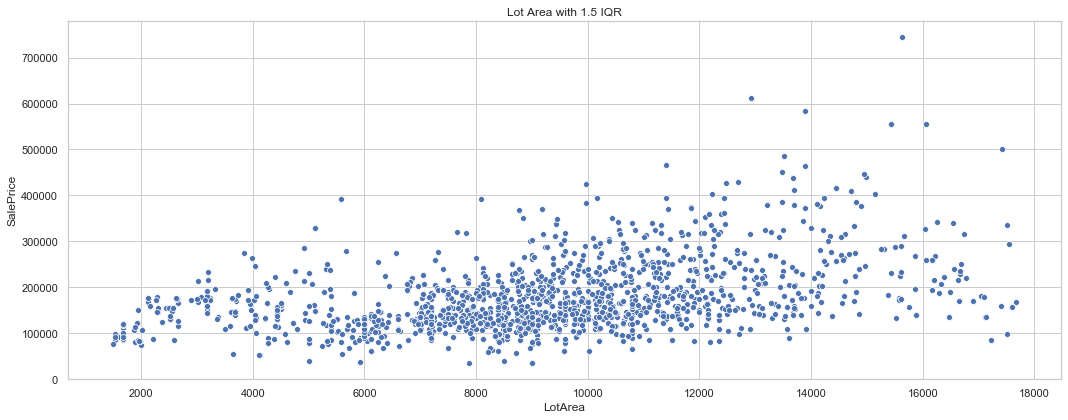

None

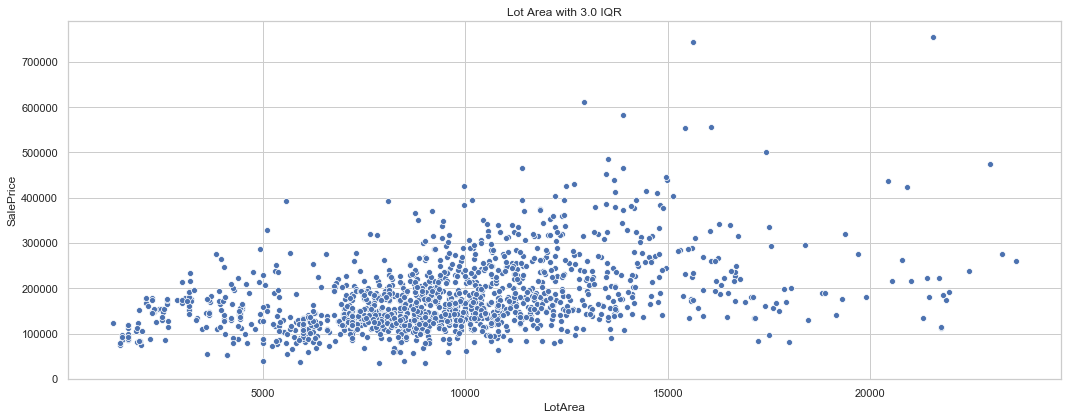

None

In [474]:
# Determine removing outlier impacts on LotArea for 1.5 and 3.0 IQR
lotAreaQ1 = train_set['LotArea'].quantile(0.25)
lotAreaQ3 = train_set['LotArea'].quantile(0.75)
IQR = lotAreaQ3 - lotAreaQ1    #IQR is interquartile range. 

for mlt in ([1.5, 3.0]):
    lotAreafilter = (train_set['LotArea'] >= lotAreaQ1 - mlt * IQR) & \
        (train_set['LotArea'] <= lotAreaQ3 + mlt *IQR)
    lotAreaNoOutliers = train_set.loc[lotAreafilter]
    lotAreaNoOutliers = lotAreaNoOutliers[['Id', 'LotArea', 'SalePrice']]
    
    #plot
    clear_plot()
    fig, axarr = plt.subplots(nrows = 1, ncols = 1, figsize=(15,6))
    sns.scatterplot(x='LotArea', y='SalePrice', data=lotAreaNoOutliers, ax=axarr).\
        set(title='Lot Area with {} IQR'.format(mlt))
    
    fig.tight_layout()
    display(plt.show())

##### Conclusion
LotArea at first appeared to be a good predictor of SalePrice but after futher analyzing by removing outliers with 1.5*IQR and 3.0*IQR it shows to have no correlation and is not a good predictor of SalePrice

### Overall Conclusion for Exploreation #1

The following features that appear to be good predictors of SalePrice. Later we will further examine which of this are good predictors of SalePrice using the correlation score of each feature with the SalePrice

- Fireplaces
- Full Bath
- GarageCars
- OverallQual
- TotRmsAbvGr
- 1stFlrSF (First Floor square feet)
- GrLivArea (Above grade (ground) living area square feet)
- TotalBsmtSF (Total square feet of basement area)
- BsmtQual
- CentralAir
- Electrical
- ExterQual
- FirepaceQu
- GarageFinish
- HeatingQC
- KitchenQual
- PoolQC

### Exploration 2: Look at the distributions using a histogram

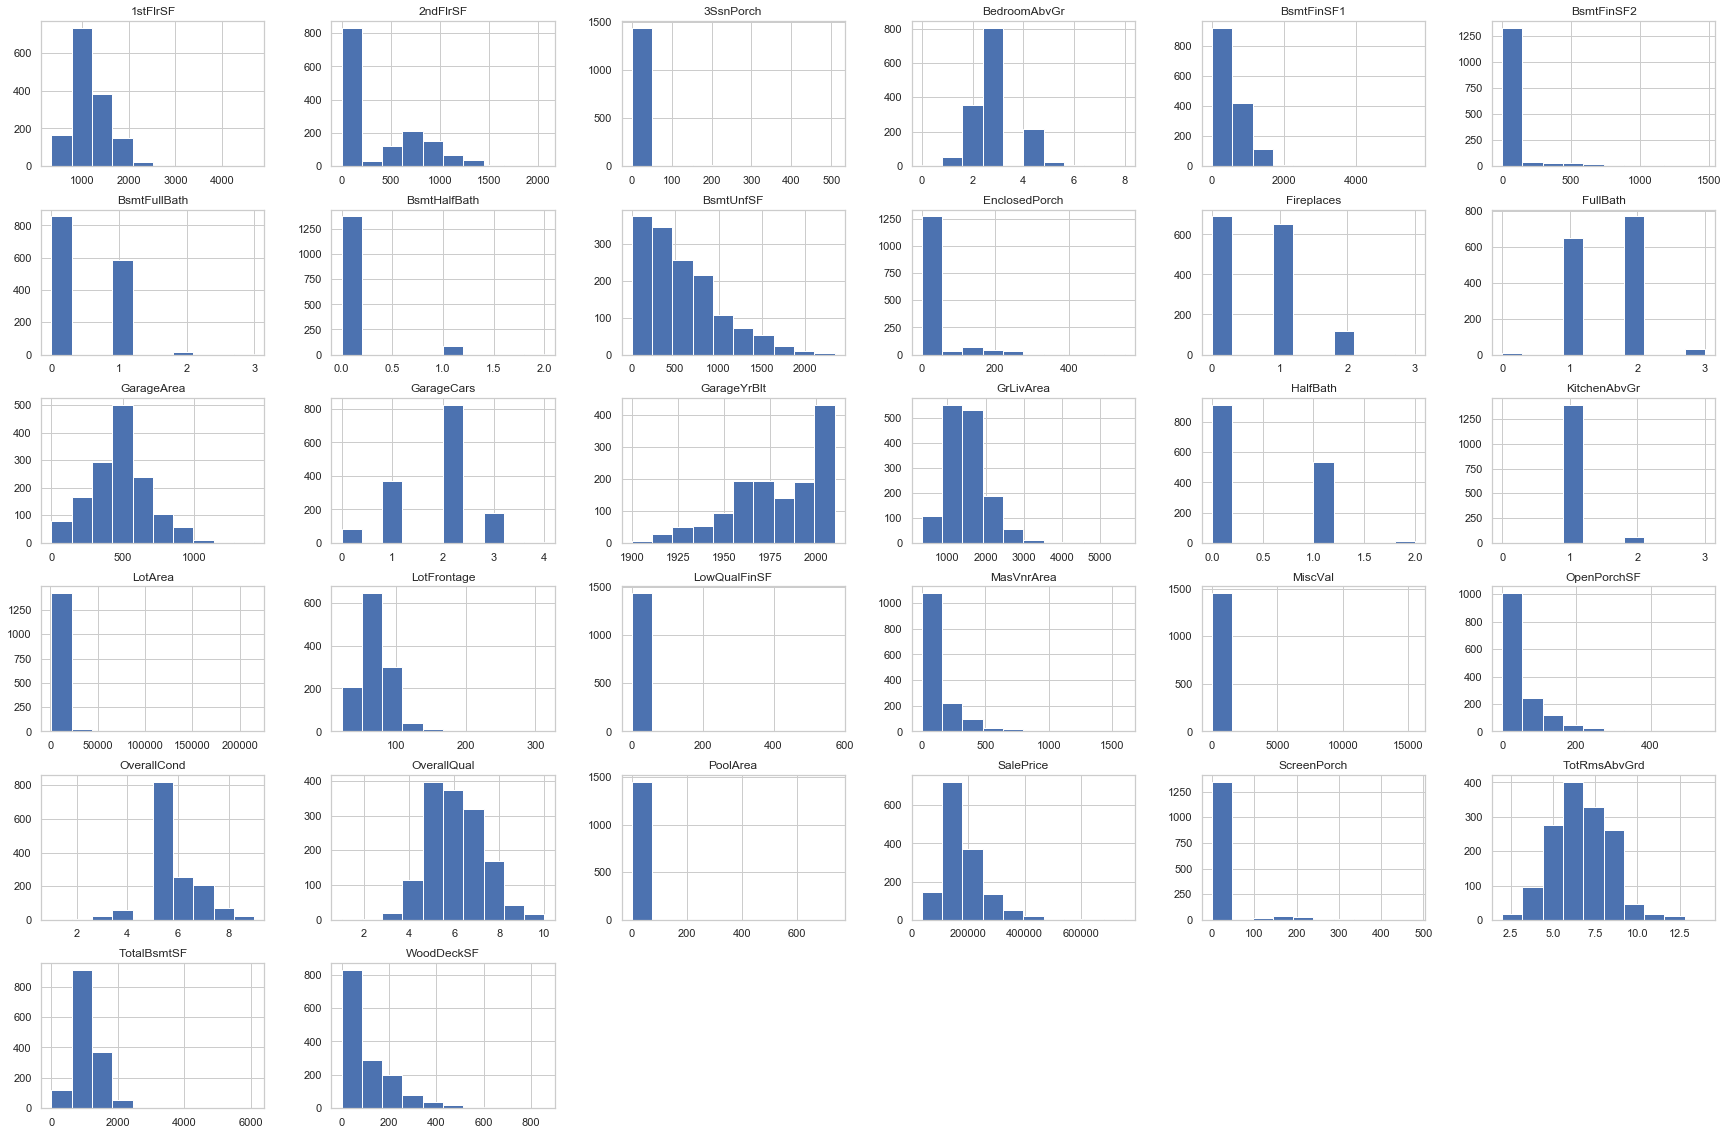

In [475]:
columns = [key for key, value in cols_to_inspect.items() if value in (['both', 'scatter'])]
columns.append('SalePrice')
feature_dist = train_set[columns]
feature_dist.hist(bins = 10, figsize = (30,20))
plt.show()

### Exploration 3: See the distribution of home sales

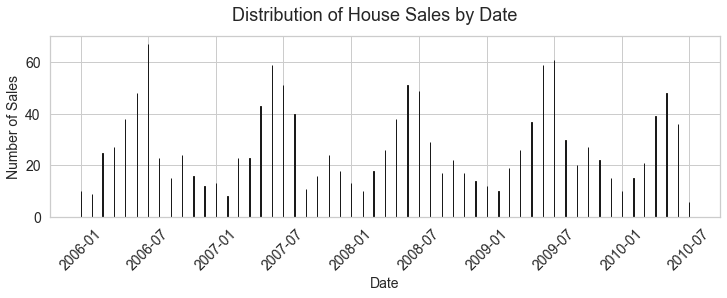

In [476]:
clear_plot()

salesByDate = train_set.groupby('SaleDate').agg({'Id': 'count'}).reset_index()
salesByDate.rename(columns={'Id': 'Count'}, inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(12,4))
axs.bar(salesByDate['SaleDate'], salesByDate['Count'], color = 'orange', edgecolor='k')
fig.suptitle('Distribution of House Sales by Date', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.subplots_adjust(bottom=0.25)
plt.grid(True)
axs.tick_params(axis='x', which='major', labelsize=14, rotation=45)
axs.tick_params(axis='y', which='major', labelsize=14)

plt.show()

#### Conclusion

The home sales in the dataset are between 2006 and 2010 (4 year period). The home prices appear to not be impacted  over the 4 year period as we can see from scatter plot in exploration 1 that shows no correlation. Therefore, the likely outcome is the sale date has no impact on the sale price

## Review research design and modeling methods (10 points)

### Explore if the fields identified in the "Data preparation, exploration, visualization" have good correlation scores with SalePrice

The fields identified are:
- Fireplaces
- FullBath
- GarageArea (Size of garage in square feet)
- GarageCars
- OverallQual
- TotRmsAbvGrd
- 1stFlrSF (First Floor square feet)
- GrLivArea (Above grade (ground) living area square feet)
- TotalBsmtSF (Total square feet of basement area)
- BsmtQual
- CentralAir
- Electrical
- ExterQual
- FireplaceQu
- GarageFinish
- HeatingQC
- KitchenQual
- PoolQC

#### First transform the categorial (nominal) data into something that can have a quantitative value

In [903]:
# Create a new train_set of the transformed data

def transform_data(originalDataset):
    datasetTransformed = originalDataset
    
    tran_set_map = {
        'BsmtQual': {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'CentralAir': {'N': 0, 'Y': 1},
        'Electrical': {np.nan: 0, 'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
        'ExterQual': {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'FireplaceQu': {'Po': 1, np.nan: 2, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'GarageFinish': {np.nan: 1, 'Unf': 2, 'RFn': 3, 'Fin': 4},
        'HeatingQC': {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'KitchenQual': {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'PoolQC': {np.nan: 0, 'Po': 0, 'Fa': 0, 'TA': 0, 'Gd': 0, 'Ex': 1}
    }    
    
    return datasetTransformed.replace(tran_set_map)
    
train_set_transformed = transform_data(train_set)
train_set_transformed_not_limited = train_set_transformed
train_set_transformed[['BsmtQual', 'CentralAir', 'Electrical', 'ExterQual', 'FireplaceQu', 'GarageFinish', \
                     'HeatingQC', 'KitchenQual', 'PoolQC']].head()

BsmtQual  CentralAir  Electrical  ExterQual  FireplaceQu  GarageFinish  \
0         4           1           5          4            2             3   
1         4           1           5          3            3             3   
2         4           1           5          4            3             3   
3         3           1           5          3            4             2   
4         4           1           5          4            3             3   

   HeatingQC  KitchenQual  PoolQC  
0          5            4       0  
1          5            3       0  
2          5            4       0  
3          4            4       0  
4          5            4       0

#### Now let's look at the correlation with each of the features identified to have strong correlation with SalePrice

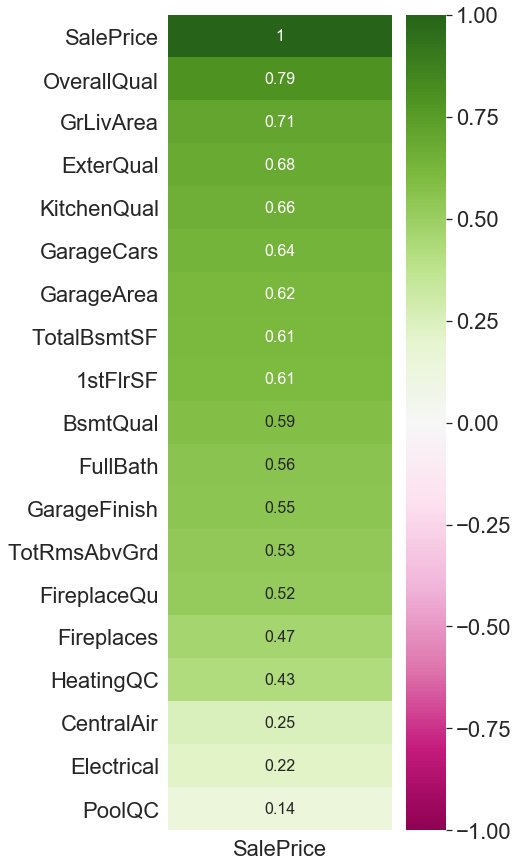

In [506]:
# limit to only the identified attributes
train_set_transformed = train_set_transformed[['Fireplaces', 'FullBath', 'GarageCars', 'OverallQual', \
    'TotRmsAbvGrd', '1stFlrSF', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'BsmtQual', 'CentralAir', \
    'Electrical', 'ExterQual', 'FireplaceQu', 'GarageFinish', 'HeatingQC', 'KitchenQual', 'PoolQC', 'SalePrice']]

corr_train_set_transformed=train_set_transformed.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_train_set_transformed[['SalePrice']].sort_values(by=['SalePrice'],\
            ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=2)

#### Now let's look at the correlation with all of the features to see if our exploratory analysis missed anything that may have an impact on the SalePrice

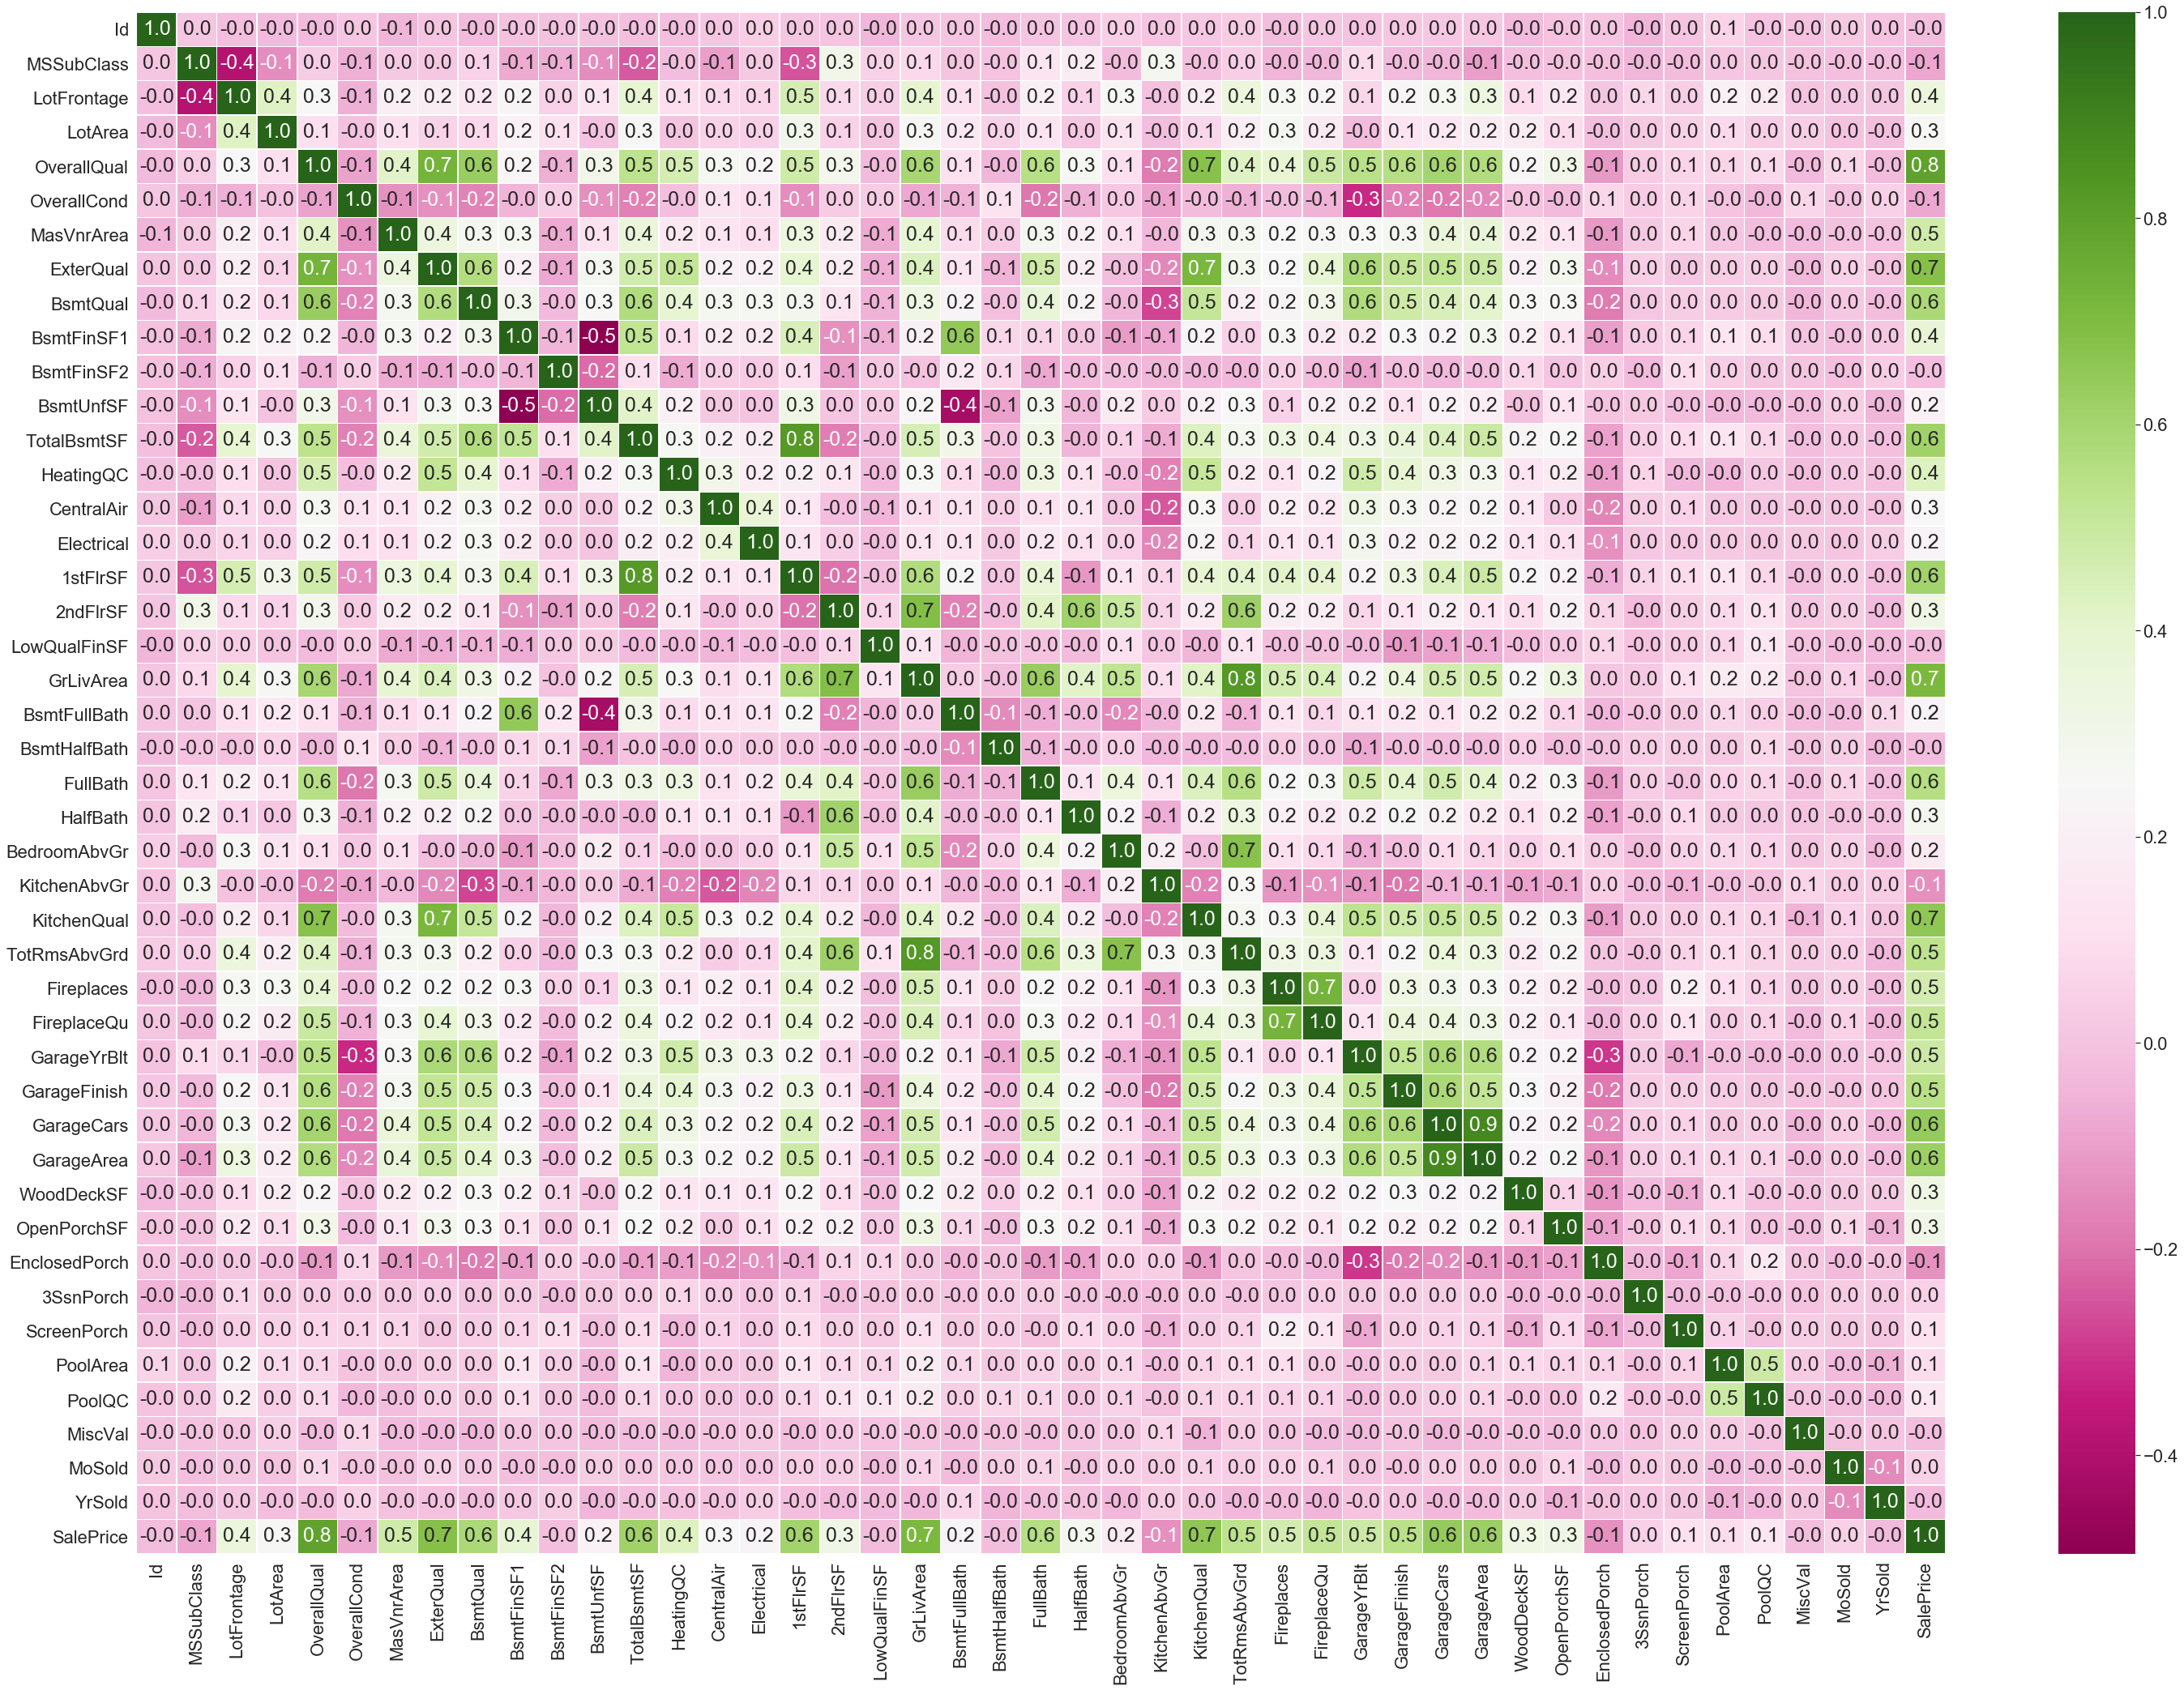

In [507]:
correlation_train = train_set_transformed_not_limited.corr()
sns.set(font_scale=2)
plt.figure(figsize=(50,35))
ax = sns.heatmap(correlation_train, annot=True, annot_kws={'size': 25}, fmt = '.1f', cmap="PiYG", linewidths=.5)

#### Fields missing from the original list:
- MasVnrArea has a correlation of 0.5, we will ignore this for now after seeing how the model appears
- OverallCond was not part of the original list but OverallQual has the strongest correlation out of all the features and best represents this category

#### Based on the themse of each feature the following features are ranked from 1 to n based on the correlation score and the top ranked in each theme will be used for the model
- Overall Score: (1) OverallQual, (2) OveralCond
- Overall SquareFeet/Size: (1) GrLivArea, (2) MasVanArea, (3) LotFrontage, (4) LotArea
- Exterior: (1) ExterQual
- Kitchen: (1) KitchenQual
- Garage: (1) GarageCars, (2) GarageArea, (3) GarageFinish
- Basement: (1) TotalBsmtSF, (2) BsmtQual
- 1st Floor: (1) 1stFlrSF
- Bathrooms: (1) FullBath
- Rooms: (1) TotRmsAbvGrd
- Fireplace: (1) FireplaceQu, (2) Fireplaces
- Heating: (1) HeatingQC
- Cooling: (1) CentralAir
- Electrical: (1) Electrical
- Pool: (1) PoolQC

#### The final list of features we will use for the model is:
- OverallQual
- GrLivArea
- ExterQual
- KitchenQual
- GarageCars
- TotalBsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrd
- FireplaceQu
- HeatingQC
- CentralAir
- PoolQC

### Start the model

#### Re-setup the data to use in the model

In [884]:
def removeOutliers(dataSet, attr, mlt = 1.5):
    Q1 = dataSet[attr].quantile(0.25)
    Q3 = dataSet[attr].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filterDataSet = (dataSet[attr] >= Q1 - mlt * IQR) & \
        (dataSet[attr] <= Q3 + mlt *IQR)
    dataSetNoOutliers = dataSet.loc[filterDataSet]
    
    return dataSetNoOutliers

def initTrainTest(dataSet):
    X = train_set_transformed[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', \
    'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu', 'HeatingQC', \
    'CentralAir', 'Electrical', 'PoolQC']]
    #y = train_set_transformed['SalePrice']
    y = np.log1p(train_set_transformed['SalePrice'])
    
    X_no_outliers = train_set_transformed[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', \
    'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu', 'HeatingQC', \
    'CentralAir', 'Electrical', 'PoolQC','SalePrice']]
    
    # remove outliers
    for attr in X_no_outliers.columns:
        if attr == 'SalePrice':
            pass
        else:
            X_no_outliers = removeOutliers(X_no_outliers, attr, mlt=1.5)
            
    y_no_outlilers = X_no_outliers['SalePrice']
    y_no_outlilers = np.log1p(X_no_outliers['SalePrice'])
    #X_no_outliers = X_no_outliers.drop('SalePrice', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = \
        train_test_split(X_no_outliers, y_no_outlilers, test_size = 0.2, random_state=0)
    
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    
    X_train_no_outliers = StandardScaler().fit_transform(X_train_no_outliers)
    X_test_no_outliers = StandardScaler().fit_transform(X_test_no_outliers)
    
    return X_train, X_test, y_train, y_test, \
                X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers

In [887]:
# bring the data back
# initialize data
train_set_transformed = transform_data(train_set) # train set
test_set_transformed = transform_data(test_set) # test set
X_train, X_test, y_train, y_test, X_train_no_outliers, X_test_no_outliers, \
    y_train_no_outliers, y_test_no_outliers = initTrainTest(train_set_transformed)

In [901]:
lr = LinearRegression().fit(X_train, y_train)
print('Linear Regression')
print('\tTraining set score: {:2f}'.format(lr.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lr.score(X_test, y_test)))
y_pred = lr.predict(X_test)
print('\tMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('\tMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('\tRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('')
print(metrics.r2_score(y_test,y_pred))
print('')

ridge = Ridge().fit(X_train, y_train)
print('Ridge - default')
print('\tTraining set score: {:2f}'.format(ridge.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Ridge - alpha=10')
print('\tTraining set score: {:2f}'.format(ridge10.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Ridge - alpha = 0.1')
print('\tTraining set score: {:2f}'.format(ridge01.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(ridge01.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print('Ridge - alpha = 0.01')
print('\tTraining set score: {:2f}'.format(ridge01.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(ridge01.score(X_test, y_test)))

lasso = Lasso().fit(X_train, y_train)
print('Lasso - default')
print('\tTraining set score: {:2f}'.format(lasso.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lasso.score(X_test, y_test)))

lasso001 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print('Lasso - alpha = 10')
print('\tTraining set score: {:2f}'.format(lasso001.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lasso001.score(X_test, y_test)))

lasso0001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Lasso - alpha = 0.01')
print('\tTraining set score: {:2f}'.format(lasso0001.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lasso0001.score(X_test, y_test)))

lasso0001 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print('Lasso - alpha = 0.1')
print('\tTraining set score: {:2f}'.format(lasso0001.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lasso0001.score(X_test, y_test)))

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.9).fit(X_train, y_train)
print('Elastic Net - alpha=0.01, l1_ratio=0.5')
print('\tTraining set score: {:2f}'.format(lasso.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lasso.score(X_test, y_test)))

Linear Regression
	Training set score: 0.846033
	Test set score: 0.764797
	Mean Absolute Error: 0.11463469040936972
	Mean Squared Error: 0.03560925739765114
	Root Mean Squared Error: 0.1887041531012265

0.7647971462349381

Ridge - default
	Training set score: 0.846033
	Test set score: 0.764956
Ridge - alpha=10
	Training set score: 0.846001
	Test set score: 0.766287
Ridge - alpha = 0.1
	Training set score: 0.846033
	Test set score: 0.764813
Ridge - alpha = 0.01
	Training set score: 0.846033
	Test set score: 0.764799
Lasso - default
	Training set score: 0.000000
	Test set score: -0.000080
Lasso - alpha = 10
	Training set score: 0.000000
	Test set score: -0.000080
Lasso - alpha = 0.01
	Training set score: 0.843617
	Test set score: 0.772804
Lasso - alpha = 0.1
	Training set score: 0.716616
	Test set score: 0.703371
Elastic Net - alpha=0.01, l1_ratio=0.5
	Training set score: 0.000000
	Test set score: -0.000080


In [894]:
y_pred = lr.predict(X_test)
df = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(y_pred)})
df['AbsDiff'] = np.abs(df['Actual'] - df['Predicted'])
df = df.sort_values(by='AbsDiff', ascending=True)

eval_df = train_set.iloc[df.index]

df.join(eval_df[['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', \
    'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu', 'HeatingQC', \
    'CentralAir', 'Electrical', 'PoolQC']].head(30), how='right')

Actual      Predicted      AbsDiff  SalePrice  OverallQual  GrLivArea  \
679   128500.0  128506.889380     6.889380     128500            5        988   
1351  171000.0  171109.687044   109.687044     171000            6       1716   
315   188500.0  188299.732209   200.267791     188500            7       1432   
268   120500.0  120703.022057   203.022057     120500            5        778   
1109  280000.0  279795.116202   204.883798     280000            8       1836   
742   179000.0  179325.331594   325.331594     179000            7       1349   
1386  250000.0  249358.138933   641.861067     250000            7       2784   
122   136000.0  135262.826339   737.173661     136000            6       1080   
826   109500.0  110264.707290   764.707290     109500            5        784   
590   185900.0  186708.075870   808.075870     185900            7       1582   
1338  200000.0  200819.088090   819.088090     200000            7       1861   
241   110500.0  111344.550183   844.550183     110500            5        866   
107   115000.0  115846.446035   846.446035     115000            5        789   
491   133000.0  132142.804615   857.195385     133000            6       1578   
215   134450.0  133521.654516   928.345484     134450            5       1236   
1078  155900.0  156882.313883   982.313883     155900            6        848   
47    249700.0  250725.886307  1025.886307     249700            8       1656   
253   158000.0  159048.907613  1048.907613     158000            6       1302   
310   165600.0  164533.192895  1066.807105     165600            6       1501   
85    260000.0  261331.794017  1331.794017     260000            8       2417   
1096  127000.0  128332.532819  1332.532819     127000            6       1355   
737   239900.0  241437.865182  1537.865182     239900            8       1801   
965   178900.0  177341.305628  1558.694372     178900            6       1484   
362   198500.0  196939.230481  1560.769519     198500            7       1922   
420   206300.0  208029.945714  1729.945714     206300            7       1344   
620    67000.0   68789.710349  1789.710349      67000            3        864   
511   202665.0  204469.202233  1804.202233     202665            7       1368   
1323   82500.0   84541.761425  2041.761425      82500            4        708   
825   385000.0  382932.871041  2067.128959     385000           10       2084   
1159  185000.0  182928.506738  2071.493262     185000            6       1876   

     ExterQual KitchenQual  GarageCars  TotalBsmtSF  1stFlrSF  FullBath  \
679         TA          TA           2          988       988         1   
1351        TA          TA           2          858       858         1   
315         Gd          Gd           2          716       716         2   
268         TA          TA           1          740       778         1   
1109        Gd          Gd           3         1836      1836         2   
742         TA          TA           2         1349      1349         2   
1386        TA          Gd           2         1392      1392         3   
122         TA          TA           1         1080      1080         1   
826         TA          Gd           0          784       784         1   
590         Gd          Gd           2          770       770         2   
1338        Gd          Gd           2          916       920         2   
241         TA          Gd           0          686       866         1   
107         TA          TA           1          789       789         1   
491         TA          Fa           1          806       958         1   
215         TA          Gd           1         1070      1236         1   
1078        Gd          Gd           2          848       848         1   
47          Gd          Gd           3         1656      1656         2   
253         TA          Gd           1         1302      1302         2   
310         TA          Gd           2          697       697         2

In [883]:
lr = LinearRegression().fit(X_train_no_outliers, y_train_no_outliers)
print('Linear Regression')
print('\tTraining set score: {:2f}'.format(lr.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lr.score(X_test, y_test)))

ridge = Ridge().fit(X_train_no_outliers, y_train_no_outliers)
print('Ridge - default')
print('\tTraining set score: {:2f}'.format(ridge.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train_no_outliers, y_train_no_outliers)
print('Ridge - alpha=10')
print('\tTraining set score: {:2f}'.format(ridge10.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train_no_outliers, y_train_no_outliers)
print('Ridge - alpha = 0.1')
print('\tTraining set score: {:2f}'.format(ridge01.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(ridge01.score(X_test, y_test)))

lasso = Lasso().fit(X_train_no_outliers, y_train_no_outliers)
print('Lasso - default')
print('\tTraining set score: {:2f}'.format(lasso.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lasso.score(X_test, y_test)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train_no_outliers, y_train_no_outliers)
print('Lasso - alpha = 0.01')
print('\tTraining set score: {:2f}'.format(lasso001.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lasso001.score(X_test, y_test)))

lasso0001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train_no_outliers, y_train_no_outliers)
print('Lasso - alpha = 0.01')
print('\tTraining set score: {:2f}'.format(lasso0001.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lasso0001.score(X_test, y_test)))

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train_no_outliers, y_train_no_outliers)
print('Elastic Net - alpha=0.1, l1_ratio=0.5')
print('\tTraining set score: {:2f}'.format(lasso.score(X_train, y_train)))
print('\tTest set score: {:2f}'.format(lasso.score(X_test, y_test)))

Linear Regression
	Training set score: 0.789343
	Test set score: 0.685222
Ridge - default
	Training set score: 0.789336
	Test set score: 0.685349
Ridge - alpha=10
	Training set score: 0.789171
	Test set score: 0.686298
Ridge - alpha = 0.1
	Training set score: 0.789343
	Test set score: 0.685235
Lasso - default
	Training set score: 0.789345
	Test set score: 0.685231
Lasso - alpha = 0.01
	Training set score: 0.789343
	Test set score: 0.685223
Lasso - alpha = 0.01
	Training set score: 0.789343
	Test set score: 0.685223
Elastic Net - alpha=0.1, l1_ratio=0.5
	Training set score: 0.789345
	Test set score: 0.685231


Remove Outliers

In [744]:
# initialize data
train_set_transformed = transform_data(train_set) # train set
test_set_transformed = transform_data(test_set) # test set

# limit data to only the features used in the model
train_set_transformed = train_set_transformed[['OverallQual', 'GrLivArea', \
    'ExterQual', 'KitchenQual', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', \
    'FireplaceQu', 'HeatingQC', 'CentralAir', 'Electrical', 'PoolQC', 'SalePrice']]

# remove outliers
pre = train_set_transformed.shape
for attr in train_set_transformed.columns:
    if attr == 'SalePrice':
        pass
    else:
        train_set_transformed = removeOutliers(train_set_transformed_no_outliers, attr, mlt=1.5)

post = train_set_transformed.shape
print('Pre outlier removal: {}\nPost outlier removal: {}'.format(pre, post))

Pre outlier removal: (1460, 15)
Post outlier removal: (1191, 15)


Use the train set to split the data since the test set does not contain a y (SalePrice) to evaluate the accuracy of the model. The train set will be split to 80% of the data to the training set while 20% of the data to test set using below code

In [745]:
X_train, X_test, y_train, y_test = initTrainTest(train_set_transformed)

In [746]:
X_train.head()

OverallQual  GrLivArea  ExterQual  KitchenQual  GarageCars  TotalBsmtSF  \
753             8       2098          4            5           3         1030   
1060            8       1338          4            4           2         1338   
914             6       1224          4            4           2          612   
893             5       1383          3            3           1         1383   
55              6       1425          3            3           2         1425   

      1stFlrSF  FullBath  TotRmsAbvGrd  FireplaceQu  HeatingQC  CentralAir  \
753       1038         2             8            4          4           1   
1060      1338         2             6            2          5           1   
914        612         2             4            2          5           1   
893       1383         1             6            4          3           1   
55        1425         2             7            4          4           1   

      Electrical  PoolQC  
753            5       0  
1060           5       0  
914            5       0  
893            5       0  
55             5       0

#### Test the Model Using: linear regression, ridge regression, lasso regression, and elastic net 

In [747]:
X_test.head()

OverallQual  GrLivArea  ExterQual  KitchenQual  GarageCars  TotalBsmtSF  \
1020            4       1132          3            4           2         1132   
1171            6       1261          3            3           2         1261   
990             8       2392          4            4           3         1396   
1245            6       1868          3            3           2          585   
200             4       1121          3            3           2         1121   

      1stFlrSF  FullBath  TotRmsAbvGrd  FireplaceQu  HeatingQC  CentralAir  \
1020      1132         1             5            2          5           1   
1171      1261         1             6            3          5           1   
990       1407         2             7            3          5           1   
1245      1140         3             7            3          5           1   
200       1121         2             5            2          5           1   

      Electrical  PoolQC  
1020           5       0  
1171           5       0  
990            5       0  
1245           5       0  
200            5       0

##### Linear Regression

Train the model

In [777]:
lr = LinearRegression().fit(X_train, y_train)

Since this is multivariable linear regression, let's see what the model found as the most optimal coefficients for all the features.

In [778]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
OverallQual   13540.643530
GrLivArea        53.172507
ExterQual     15075.400581
KitchenQual   13845.541938
GarageCars    11928.124232
TotalBsmtSF      32.043745
1stFlrSF          9.663196
FullBath      -3594.029606
TotRmsAbvGrd  -1264.880870
FireplaceQu    4739.015580
HeatingQC      1355.742176
CentralAir     9522.576407
Electrical     1074.356671
PoolQC       -94884.800314

What is the offset (intercept)

In [779]:
lr.intercept_

-166879.94833423896

In [776]:
# bring the data back
# initialize data
train_set_transformed = transform_data(train_set) # train set
test_set_transformed = transform_data(test_set) # test set
X_train, X_test, y_train, y_test = initTrainTest(train_set_transformed)

Evaluate the accuracy

In [780]:
print('Training set score: {:2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.812932
Test set score: 0.642909


In [766]:
y_pred = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['AbsDiff'] = np.abs(df['Actual'] - df['Predicted'])
df = df.sort_values(by='AbsDiff', ascending=False)

eval_df = train_set.iloc[df.index]

df.join(eval_df[['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', \
    'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu', 'HeatingQC', \
    'CentralAir', 'Electrical', 'PoolQC']].head(30), how='right')

Actual      Predicted        AbsDiff  SalePrice  OverallQual  GrLivArea  \
1298  160000  696376.234915  536376.234915     160000           10       5642   
1182  745000  389489.511521  355510.488479     745000           10       4476   
769   538000  380058.390090  157941.609910     538000            8       3279   
688   392000  240206.063239  151793.936761     392000            8       1419   
440   555000  419782.543786  135217.456214     555000           10       2402   
632    82500  189998.728910  107498.728910      82500            7       1411   
728   110000  195591.601071   85591.601071     110000            5       1776   
1223  137900  215905.305963   78005.305963     137900            5       2136   
482   155000  232647.223287   77647.223287     155000            7       1826   
666   129000  206065.178085   77065.178085     129000            6       2380   
529   200624  274311.820597   73687.820597     200624            6       2515   
1387  136000  208731.155793   72731.155793     136000            6       2526   
662   110000  181671.122144   71671.122144     110000            6       1392   
58    438780  367822.697009   70957.302991     438780           10       2945   
53    385000  314170.916404   70829.083596     385000            9       1842   
991   168000  237375.597961   69375.597961     168000            8       1742   
231   403000  333887.116978   69112.883022     403000            8       2794   
1415  175900  242222.440234   66322.440234     175900            7       1569   
198   104000  170256.420342   66256.420342     104000            6       2229   
161   412500  348519.353420   63980.646580     412500            9       2668   
678   372500  311623.601550   60876.398450     372500            8       2046   
1323   82500   22947.487273   59552.512727      82500            4        708   
1173  200500  258339.420119   57839.420119     200500            5       3086   
446   190000  246999.888830   56999.888830     190000            6       1888   
56    172500  229142.439111   56642.439111     172500            8       1739   
963   239000  294263.287347   55263.287347     239000            9       1800   
520   106250   51357.394475   54892.605525     106250            4       1294   
1017  187500  240893.997081   53393.997081     187500            8       1360   
330   119000  172068.657297   53068.657297     119000            5       1728   
401   164990  217588.440714   52598.440714     164990            7       1310   

     ExterQual KitchenQual  GarageCars  TotalBsmtSF  1stFlrSF  FullBath  \
1298        Ex          Ex           2         6110      4692         2   
1182        Gd          Ex           3         2396      2411         3   
769         Ex          Ex           3         1650      1690         3   
688         Gd          Gd           2         1419      1419         2   
440         Ex          Ex           3         3094      2402         2   
632         TA          TA           2         1386      1411         2   
728         TA          TA           3         1584      1776         2   
1223        TA          TA           2         2136      2136         2   
482         Gd          Ex           1          910       916         1   
666         TA          TA           2         1021      1465         2   
529         Gd          TA           2         2035      2515         3   
1387        TA          Gd           1          714      1664         2   
662         TA          TA           2         1392      1392         1   
58          Ex          Gd           3         1410      1426         3   
53          Gd          Gd           3         1842      1842         0   
991         Gd          Gd           2          916       916         1   
231         Gd          Ex           3         1462      1490         2   
1415        Gd          Gd           3         1386      1569         2   
198         TA          TA           0          755       929        

##### Ridge Regression

Train the model, using the default alpha=1.0

In [786]:
ridge = Ridge().fit(X_train, y_train)

Evaluate the accuracy

In [633]:
print('Training set score: {:2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.812619
Test set score: 0.659386


Evaluate the accuracy using alpha=10

In [635]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.811886
Test set score: 0.670686


Evaluate the accuracy using alpha=0.1

In [636]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.812921
Test set score: 0.646103


##### Lasso Regression

Train the model, using the default alpha=1.0

In [637]:
lasso = Lasso().fit(X_train, y_train)

Evaluate the accuracy

In [638]:
print('Training set score: {:2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:2f}'.format(lasso.score(X_test, y_test)))

Training set score: 0.812932
Test set score: 0.643350


Evaluate the accuracy using alpha=0.01 and max_iter=100000

In [639]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:2f}'.format(lasso001.score(X_test, y_test)))

Training set score: 0.812932
Test set score: 0.642913


In [640]:
lasso0001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:2f}'.format(lasso0001.score(X_train, y_train)))
print('Test set score: {:2f}'.format(lasso0001.score(X_test, y_test)))

Training set score: 0.812932
Test set score: 0.642913


##### ElasticNet

Train the model using alpha = 0.1 and ll_ratio of 0.5

In [641]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train, y_train)

Evaluate the accuracy

In [642]:
print('Training set score: {:2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:2f}'.format(lasso.score(X_test, y_test)))

Training set score: 0.812932
Test set score: 0.643350
